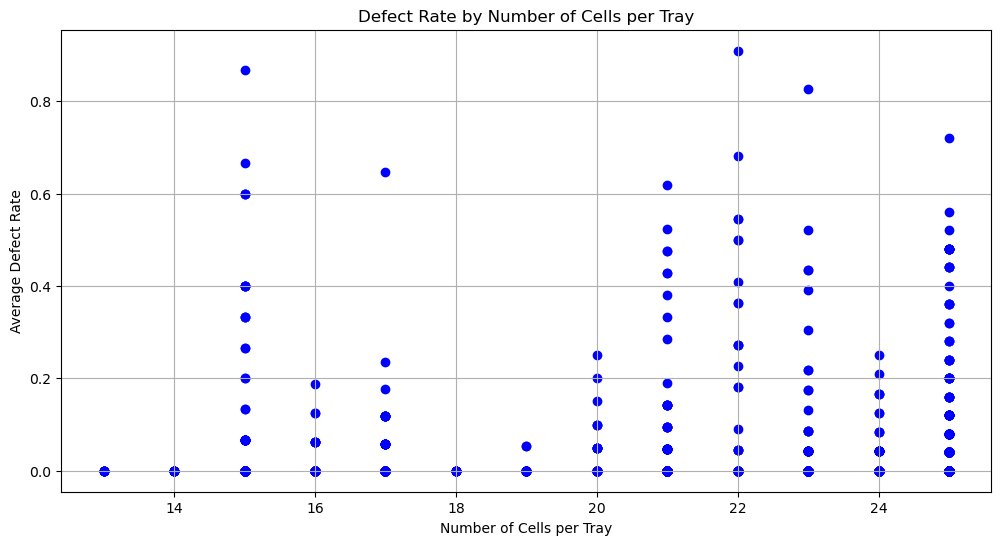

In [19]:
import matplotlib.pyplot as plt

# 시각화를 위한 데이터 준비
tray_summary['tray_id'] = tray_summary['tray_id'].astype(str)

# 시각화
plt.figure(figsize=(12, 6))
plt.scatter(tray_summary['cell_count'], tray_summary['average_defect_rate'], color='blue')
plt.title('Defect Rate by Number of Cells per Tray')
plt.xlabel('Number of Cells per Tray')
plt.ylabel('Average Defect Rate')
plt.grid(True)
plt.show()


In [23]:
import pandas as pd

# 데이터 불러오기
process_data = pd.read_csv('bat_process.csv', encoding = 'euc-kr')
tat_data = pd.read_csv('bat_tat.csv')

# 두 데이터셋을 'lot_id'와 'tray_id'를 기준으로 병합
merged_data = pd.merge(process_data, tat_data, on=['lot_id', 'tray_id'])

# cell_id별로 그룹화하여 OCV1 과정에서의 불량률 계산
ocv1_defect_rate = merged_data.groupby('cell_id').apply(
    lambda x: (x['judge'] == '불량').sum() / x['judge'].count()).reset_index()
ocv1_defect_rate.columns = ['cell_id', 'defect_rate_ocv1']

# 결과 출력
print(ocv1_defect_rate)


          cell_id  defect_rate_ocv1
0      CELL-10001               0.0
1      CELL-10002               0.0
2      CELL-10003               0.0
3      CELL-10004               0.0
4      CELL-10005               0.0
...           ...               ...
38590  CELL-54475               0.0
38591  CELL-54476               0.0
38592  CELL-54477               0.0
38593  CELL-54478               0.0
38594  CELL-54479               0.0

[38595 rows x 2 columns]


In [24]:
import pandas as pd

# 데이터 불러오기
process_data = pd.read_csv('bat_process.csv', encoding = 'euc-kr')
tat_data = pd.read_csv('bat_tat.csv')

# 두 데이터셋을 'lot_id'와 'tray_id'를 기준으로 병합
merged_data = pd.merge(process_data, tat_data, on=['lot_id', 'tray_id'])

# tray_id별로 그룹화하여 OCV1 과정에서의 불량률 계산
ocv1_defect_rate_tray = merged_data.groupby('tray_id').apply(
    lambda x: (x['judge'] == '불량').sum() / x['judge'].count()).reset_index()
ocv1_defect_rate_tray.columns = ['tray_id', 'defect_rate_ocv1']

# 결과 출력
print(ocv1_defect_rate_tray)


        tray_id  defect_rate_ocv1
0     TRAY-1002          0.000000
1     TRAY-1003          0.000000
2     TRAY-1004          0.000000
3     TRAY-1005          0.000000
4     TRAY-1006          0.000000
...         ...               ...
1775  TRAY-2787          0.142857
1776  TRAY-2788          0.250000
1777  TRAY-2789          0.120000
1778  TRAY-2790          0.041667
1779  TRAY-2791          0.200000

[1780 rows x 2 columns]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
data = pd.read_csv('total_20.csv')
data

,lot_id,tray_id,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,c2_tat,dc2_tat,...,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an,result
0,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,10단,3759.6,5.0,6.8,4709.0,37583.0,92.0,626.0,109.0,0
1,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,10단,3760.4,5.1,6.8,4712.0,37591.0,92.0,606.0,5.0,0
2,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,10단,3760.4,4.9,6.7,4737.0,37594.0,92.0,566.0,-10.0,0
3,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,10단,3759.0,5.1,6.9,4709.0,37578.0,92.0,606.0,111.0,0
4,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,10단,3759.0,5.0,6.7,4706.0,37577.0,93.0,606.0,-38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31025,LOT-144,TRAY-2791,152836,87334,156490,118,3553,405,451,405,...,13단,3759.2,5.3,7.2,4745.0,37583.0,94.0,643.0,-35.0,0
31026,LOT-144,TRAY-2791,152836,87334,156490,118,3553,405,451,405,...,13단,3759.2,5.3,7.1,4746.0,37583.0,94.0,620.0,89.0,0
31027,LOT-144,TRAY-2791,152836,87334,156490,118,3553,405,451,405,...,13단,3760.3,5.2,7.0,4782.0,37595.0,92.0,597.0,-23.0,0
31028,LOT-144,TRAY-2791,152836,87334,156490,118,3553,405,451,405,...,13단,3760.0,5.3,7.0,4751.0,37590.0,95.0,620.0,3.0,0


In [31]:
# 필요한 컬럼만 필터링
df_filtered = data[['ocv1_ocv', 'ocv1_box_col', 'result']]

# 'result' 컬럼을 'is_defective'라는 이진 컬럼으로 변환 (0: 양품, 1: 불량)
df_filtered['is_defective'] = df_filtered['result'].apply(lambda x: 1 if x != 0 else 0)

C:\Users\SU_HYUN\AppData\Local\Temp\ipykernel_16064\1241863285.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['is_defective'] = df_filtered['result'].apply(lambda x: 1 if x != 0 else 0)


C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_

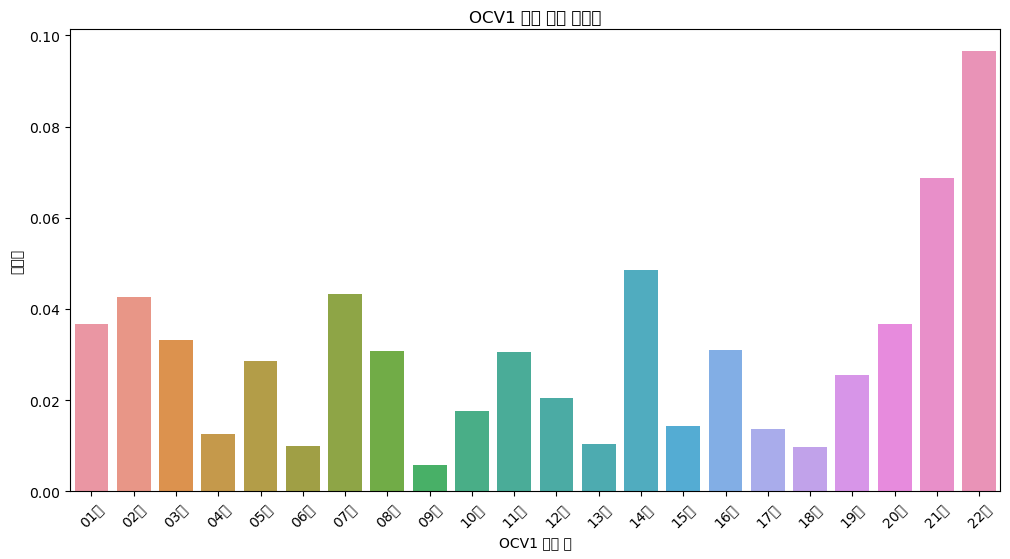

In [32]:
# OCV1 박스 열별 불량률 계산
defect_rate_per_col = df_filtered.groupby('ocv1_box_col')['is_defective'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='ocv1_box_col', y='is_defective', data=defect_rate_per_col)
plt.xlabel('OCV1 박스 열')
plt.ylabel('불량률')
plt.title('OCV1 박스 열별 불량률')
plt.xticks(rotation=45)
plt.show()


C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


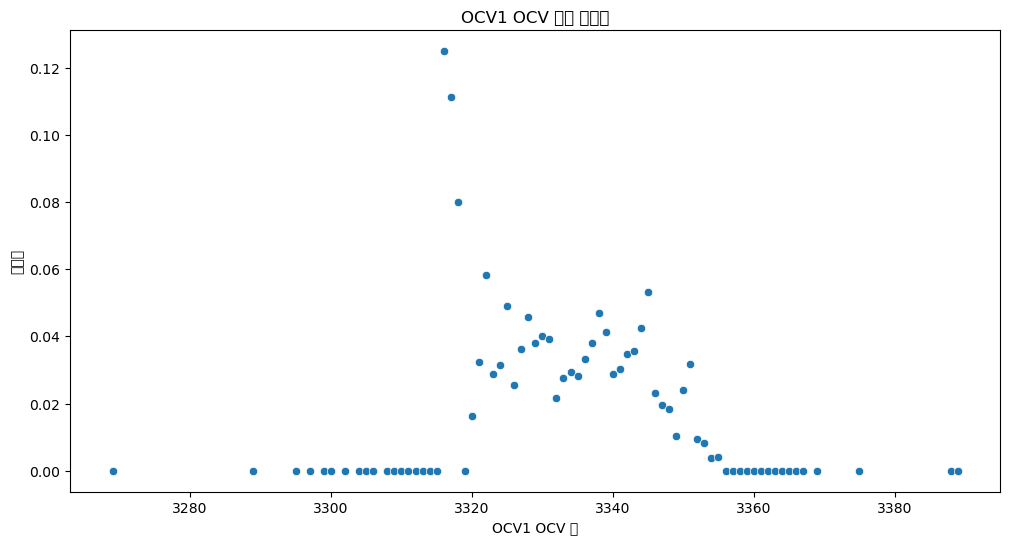

In [33]:
# OCV1 OCV 값별 불량률 계산
defect_rate_per_ocv = df_filtered.groupby('ocv1_ocv')['is_defective'].mean().reset_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ocv1_ocv', y='is_defective', data=defect_rate_per_ocv)
plt.xlabel('OCV1 OCV 값')
plt.ylabel('불량률')
plt.title('OCV1 OCV 값별 불량률')
plt.show()


C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from current font.
  fig.canvas.draw()
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:

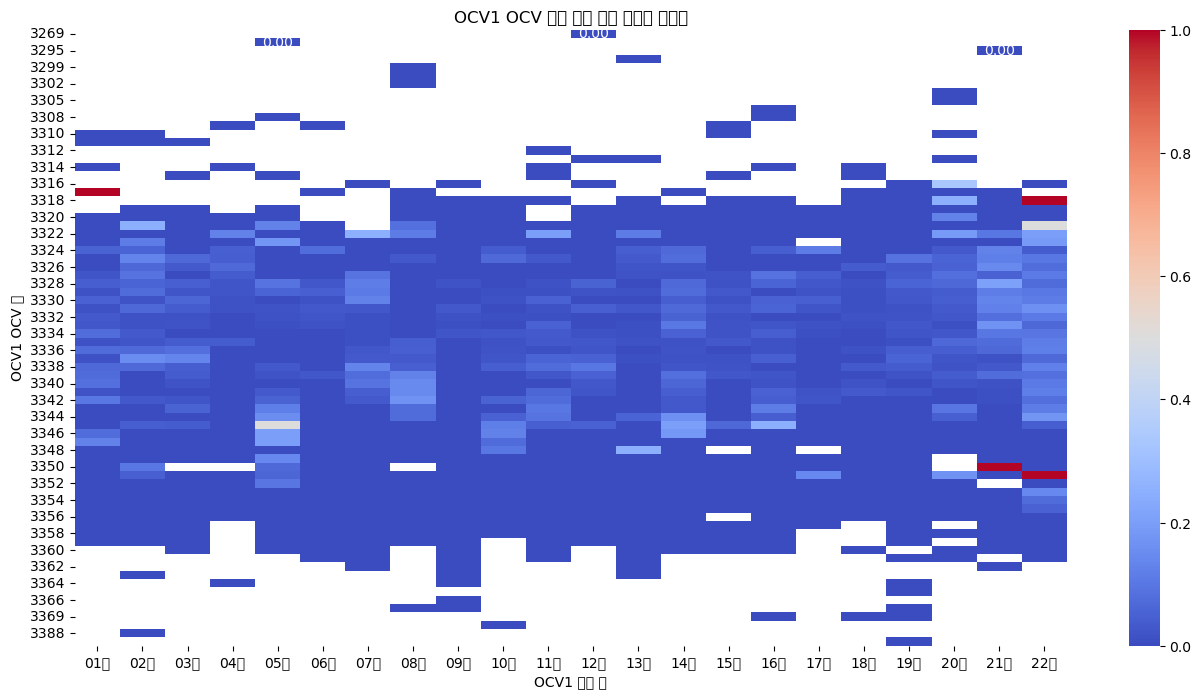

In [34]:
# 피벗 테이블 생성
pivot_table = df_filtered.pivot_table(values='is_defective', index='ocv1_ocv', columns='ocv1_box_col', aggfunc='mean')

# 히트맵 시각화
plt.figure(figsize=(16, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f")
plt.xlabel('OCV1 박스 열')
plt.ylabel('OCV1 OCV 값')
plt.title('OCV1 OCV 값과 박스 열별 불량률 히트맵')
plt.show()


C:\Users\SU_HYUN\AppData\Local\Temp\ipykernel_16064\2432526089.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_dan['is_defective'] = df_filtered_dan['result'].apply(lambda x: 1 if x != 0 else 0)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from curren

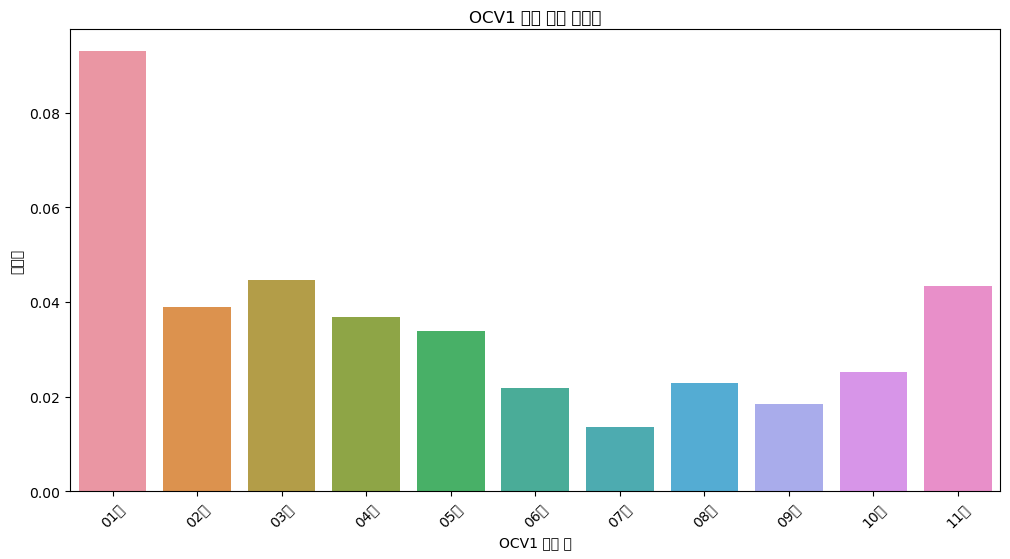

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.draw()
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\

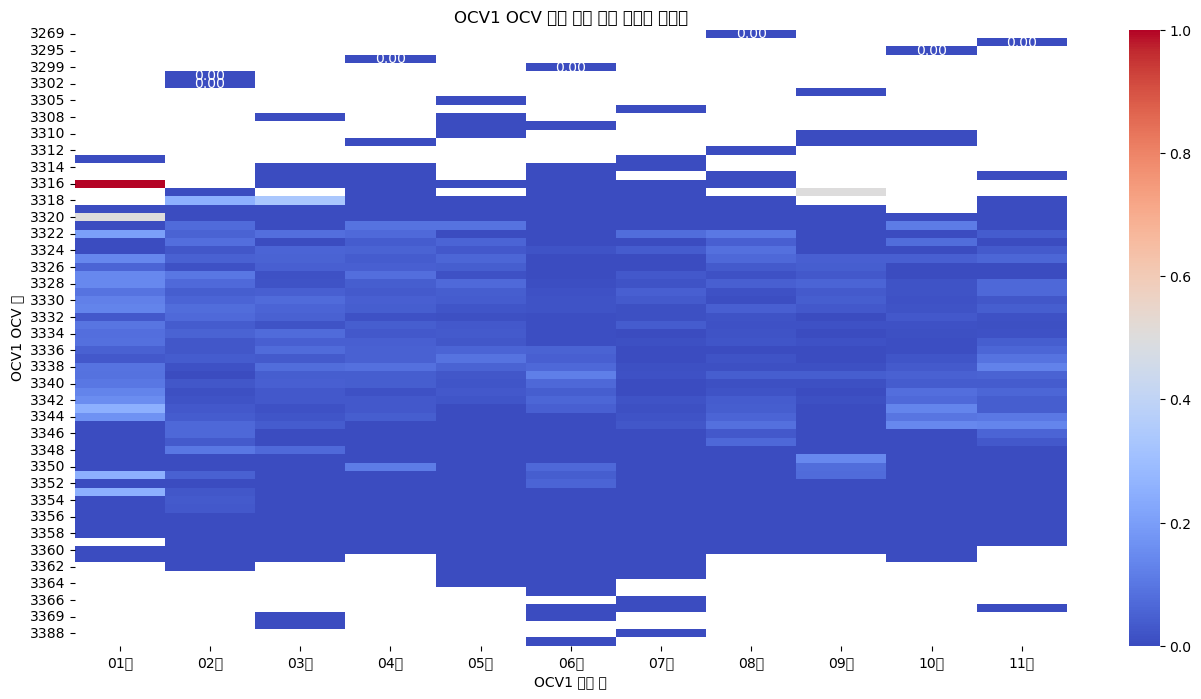

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 경로
data = pd.read_csv('total_20.csv')

# 필요한 컬럼만 필터링
df_filtered_dan = data[['ocv1_ocv', 'ocv1_box_dan', 'result']]

# 'result' 컬럼을 'is_defective'라는 이진 컬럼으로 변환 (0: 양품, 1: 불량)
df_filtered_dan['is_defective'] = df_filtered_dan['result'].apply(lambda x: 1 if x != 0 else 0)

# OCV1 박스 단별 불량률 계산
defect_rate_per_dan = df_filtered_dan.groupby('ocv1_box_dan')['is_defective'].mean().reset_index()

# OCV1 박스 단별 불량률 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='ocv1_box_dan', y='is_defective', data=defect_rate_per_dan)
plt.xlabel('OCV1 박스 단')
plt.ylabel('불량률')
plt.title('OCV1 박스 단별 불량률')
plt.xticks(rotation=45)
plt.show()

# 피벗 테이블 생성
pivot_table_dan = df_filtered_dan.pivot_table(values='is_defective', index='ocv1_ocv', columns='ocv1_box_dan', aggfunc='mean')

# 히트맵 시각화
plt.figure(figsize=(16, 8))
sns.heatmap(pivot_table_dan, cmap='coolwarm', annot=True, fmt=".2f")
plt.xlabel('OCV1 박스 단')
plt.ylabel('OCV1 OCV 값')
plt.title('OCV1 OCV 값과 박스 단별 불량률 히트맵')
plt.show()


In [49]:
import pandas as pd

# 불량률이 높은 구간을 찾아서 데이터프레임으로 반환하는 함수
def find_high_defect_zones(data, ocv_column, curr_column, result_column, threshold=0.2):
    # 필요한 컬럼만 필터링
    df_filtered = data[[ocv_column, curr_column, result_column]].copy()
    
    # 'result' 컬럼을 'is_defective'라는 이진 컬럼으로 변환 (0: 양품, 1: 불량)
    df_filtered.loc[:, 'is_defective'] = df_filtered[result_column].apply(lambda x: 1 if x != 0 else 0)
    
    # 피벗 테이블 생성
    pivot_table = df_filtered.pivot_table(values='is_defective', index=ocv_column, columns=curr_column, aggfunc='mean')
    
    # 불량률이 높은 구간 찾기 (불량률 threshold 이상)
    high_defect_zones = pivot_table[pivot_table > threshold].dropna(how='all', axis=0).dropna(how='all', axis=1)
    
    return high_defect_zones


# 데이터 불러오기
data = pd.read_csv('total_20.csv')

# 불량률이 높은 구간 찾기
high_defect_zones = find_high_defect_zones(data, 'ocv1_ocv', 'c1_curr_end', 'result', threshold=0.2)

# 보기 좋게 스타일링하여 출력
def style_high_defect_zones(df):
    styled_df = df.style.background_gradient(cmap='Reds').format(precision=2)
    return styled_df

# 스타일링된 데이터프레임 출력
styled_high_defect_zones = style_high_defect_zones(high_defect_zones)
styled_high_defect_zones


c1_curr_end,6796,6799,6801,6802,6803,6804,6807
ocv1_ocv,,,,,,,
3316,nan,nan,0.25,nan,nan,nan,nan
3317,nan,0.33,nan,nan,nan,nan,nan
3318,nan,nan,nan,0.25,nan,nan,nan
3320,nan,nan,nan,nan,0.33,nan,nan
3322,nan,nan,nan,nan,0.25,0.50,nan
3327,0.50,nan,nan,nan,nan,nan,nan
3329,0.25,nan,nan,nan,nan,nan,nan
3331,0.40,nan,nan,nan,nan,nan,nan
3336,nan,nan,nan,nan,nan,0.40,1.00


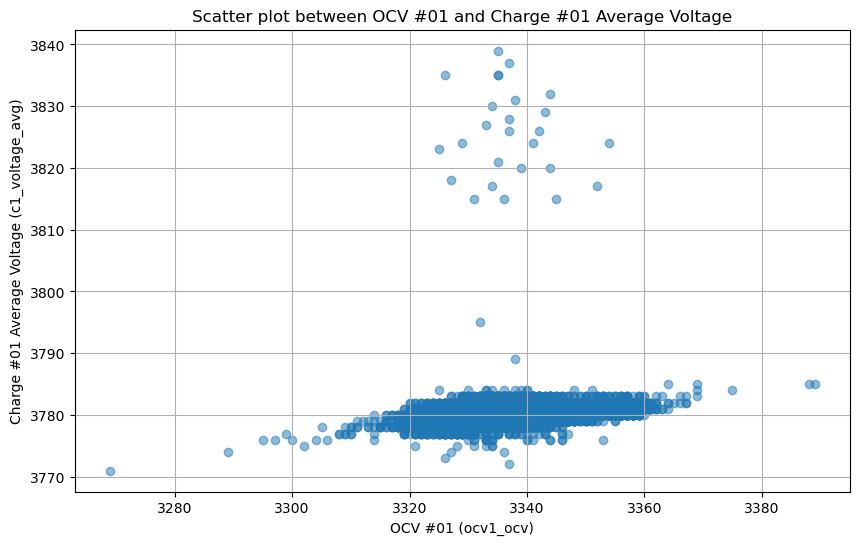

                ocv1_ocv  c1_voltage_avg
ocv1_ocv        1.000000        0.247477
c1_voltage_avg  0.247477        1.000000


In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('total_20.csv')

# 관련 있는 컬럼 추출: 'ocv1_ocv'와 'c1_voltage_avg'
relevant_data_voltage = data[['ocv1_ocv', 'c1_voltage_avg']]

# 결측값이 있는 행 제거
relevant_data_voltage = relevant_data_voltage.dropna()

# 'ocv1_ocv'와 'c1_voltage_avg' 사이의 상관관계 확인
correlation_voltage = relevant_data_voltage.corr()

# 산점도로 관계 시각화
plt.figure(figsize=(10, 6))
plt.scatter(relevant_data_voltage['ocv1_ocv'], relevant_data_voltage['c1_voltage_avg'], alpha=0.5)
plt.title('Scatter plot between OCV #01 and Charge #01 Average Voltage')
plt.xlabel('OCV #01 (ocv1_ocv)')
plt.ylabel('Charge #01 Average Voltage (c1_voltage_avg)')
plt.grid(True)
plt.show()

# 상관관계 매트릭스 출력
print(correlation_voltage)


OCV #01 (ocv1_ocv)와 Charge #01 평균 전압 (c1_voltage_avg) 사이의 상관관계는 0.247로, 약한 양의 상관관계를 보입니다. 이는 OCV #01이 증가할 때 Charge #01 평균 전압도 다소 증가하는 경향이 있음을 나타냅니다. 하지만 이 값이 높지 않기 때문에 두 변수 간의 관계가 강하다고 보기는 어렵습니다. 산점도에서도 이러한 경향이 약하게 나타나는 것을 확인할 수 있습니다. ​

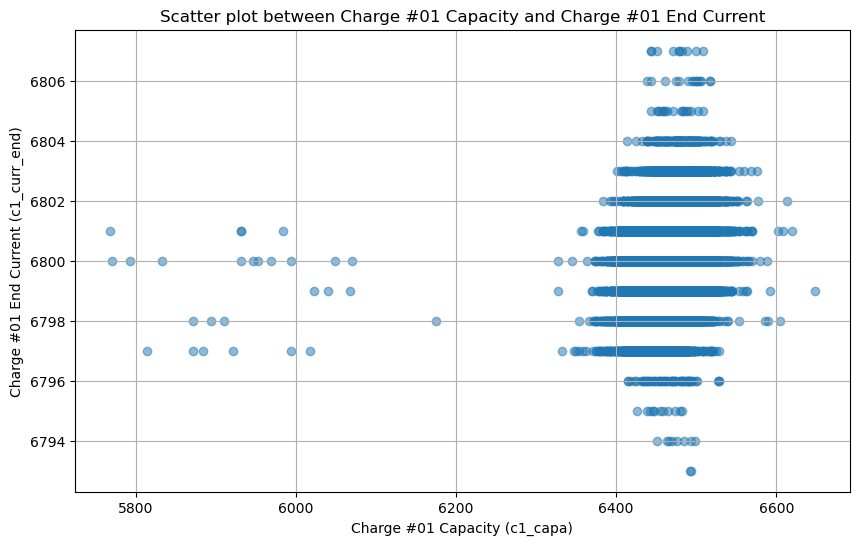

             c1_capa  c1_curr_end
c1_capa      1.00000      0.22386
c1_curr_end  0.22386      1.00000


In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('total_20.csv')

# 관련 있는 컬럼 추출: 'c1_capa'와 'c1_curr_end'
relevant_data_capa = data[['c1_capa', 'c1_curr_end']]

# 결측값이 있는 행 제거
relevant_data_capa = relevant_data_capa.dropna()

# 'c1_capa'와 'c1_curr_end' 사이의 상관관계 확인
correlation_capa = relevant_data_capa.corr()

# 산점도로 관계 시각화
plt.figure(figsize=(10, 6))
plt.scatter(relevant_data_capa['c1_capa'], relevant_data_capa['c1_curr_end'], alpha=0.5)
plt.title('Scatter plot between Charge #01 Capacity and Charge #01 End Current')
plt.xlabel('Charge #01 Capacity (c1_capa)')
plt.ylabel('Charge #01 End Current (c1_curr_end)')
plt.grid(True)
plt.show()

# 상관관계 매트릭스 출력
print(correlation_capa)


In [ ]:
# c1_capa와 c1_ccval과의 관계

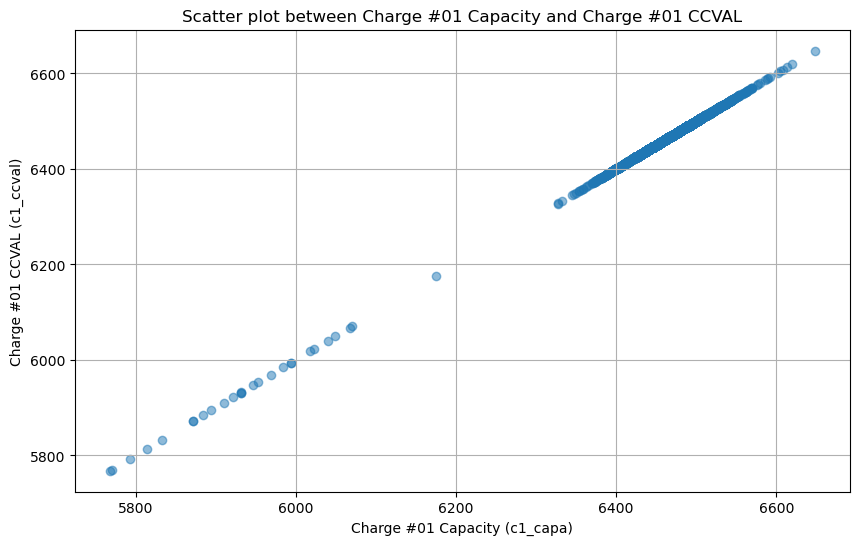

          c1_capa  c1_ccval
c1_capa       1.0       1.0
c1_ccval      1.0       1.0


In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('total_20.csv')

# 관련 있는 컬럼 추출: 'c1_capa'와 'c1_ccval'
relevant_data_ccval = data[['c1_capa', 'c1_ccval']]

# 결측값이 있는 행 제거
relevant_data_ccval = relevant_data_ccval.dropna()

# 'c1_capa'와 'c1_ccval' 사이의 상관관계 확인
correlation_ccval = relevant_data_ccval.corr()

# 산점도로 관계 시각화
plt.figure(figsize=(10, 6))
plt.scatter(relevant_data_ccval['c1_capa'], relevant_data_ccval['c1_ccval'], alpha=0.5)
plt.title('Scatter plot between Charge #01 Capacity and Charge #01 CCVAL')
plt.xlabel('Charge #01 Capacity (c1_capa)')
plt.ylabel('Charge #01 CCVAL (c1_ccval)')
plt.grid(True)
plt.show()

# 상관관계 매트릭스 출력
print(correlation_ccval)


In [53]:
data.head()

,lot_id,tray_id,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,c2_tat,dc2_tat,...,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an,result
0,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,10단,3759.6,5.0,6.8,4709.0,37583.0,92.0,626.0,109.0,0
1,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,10단,3760.4,5.1,6.8,4712.0,37591.0,92.0,606.0,5.0,0
2,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,10단,3760.4,4.9,6.7,4737.0,37594.0,92.0,566.0,-10.0,0
3,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,10단,3759.0,5.1,6.9,4709.0,37578.0,92.0,606.0,111.0,0
4,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,10단,3759.0,5.0,6.7,4706.0,37577.0,93.0,606.0,-38.0,0


C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from current font.
  fig.canvas.draw()
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.draw()
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: U

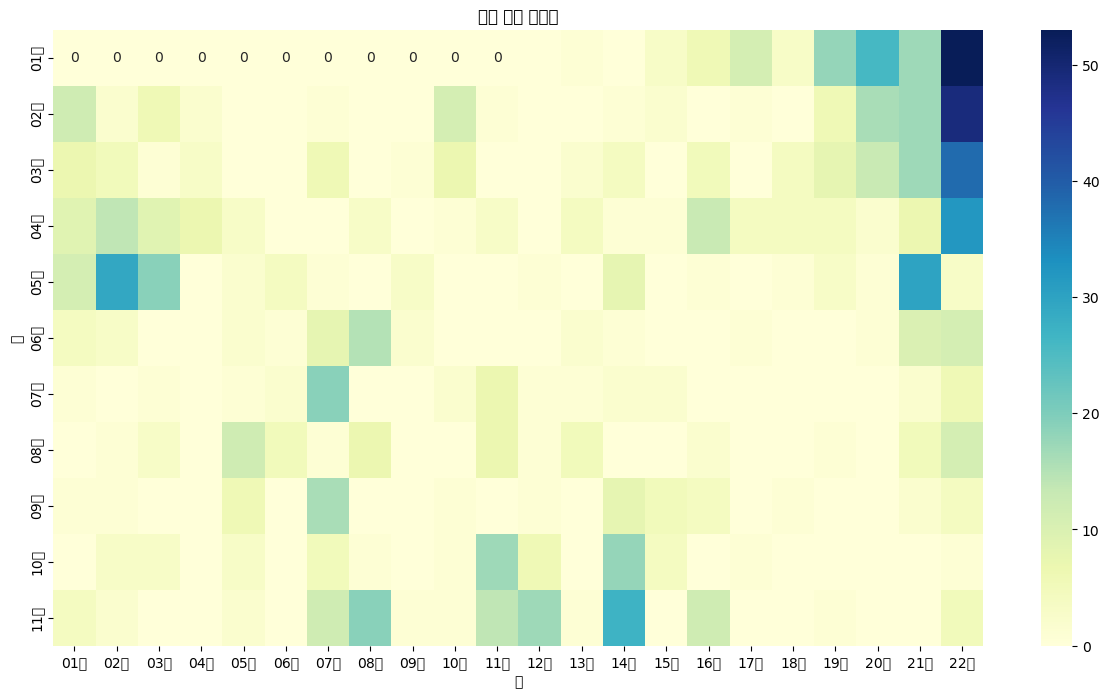

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
data = pd.read_csv('total_20.csv')

# 불량 데이터 필터링
defective_data = data[data['result'] == 1]

# 피벗 테이블 생성
heatmap_data = defective_data.pivot_table(index='c1_box_dan', columns='c1_box_col', aggfunc='size', fill_value=0)

# 히트맵 시각화
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('불량 개수 히트맵')
plt.xlabel('열')
plt.ylabel('단')
plt.show()


# charge #01 공정에서 열과 단 비교

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HY

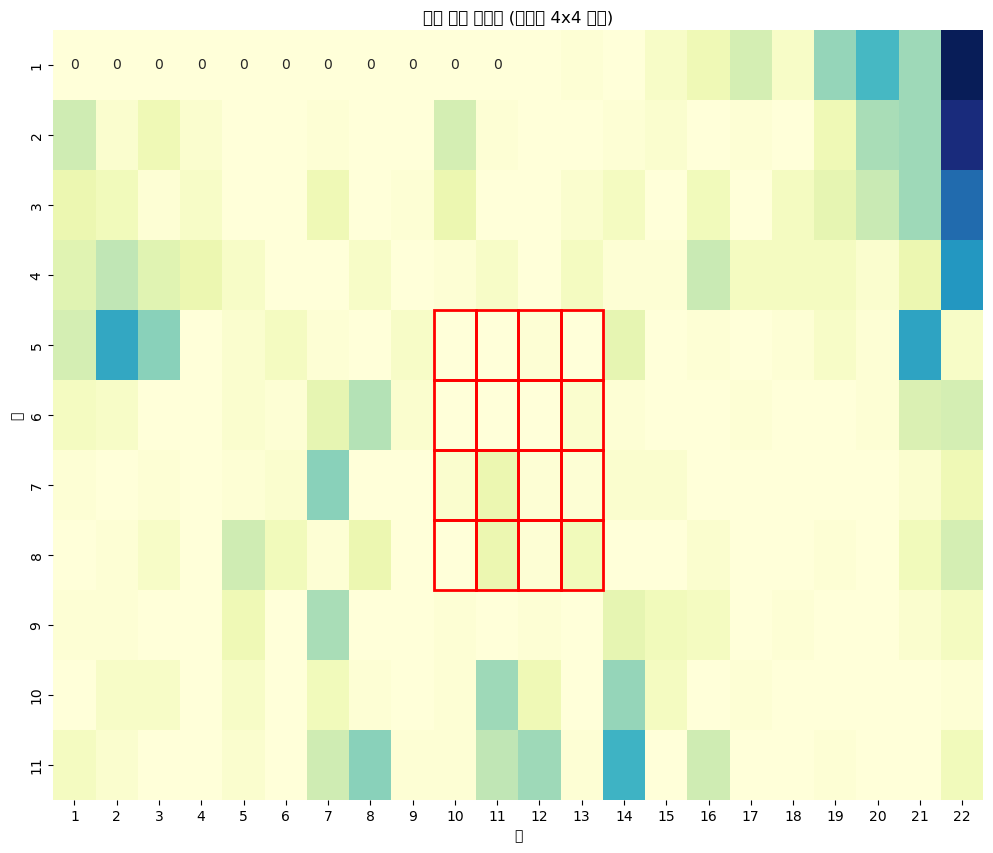

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 불러오기
data = pd.read_csv('data_fin.csv')
data["judge"] = data["judge"].map(lambda x : 0 if x == "양품" else 1)

# 불량 데이터 필터링
defective_data = data[data['judge'] == 1]

# 피벗 테이블 생성
heatmap_data = defective_data.pivot_table(index='c1_box_dan', columns='c1_box_col', aggfunc='size', fill_value=0)

# 열과 단을 숫자로 변환하여 처리
heatmap_data.columns = heatmap_data.columns.map(lambda x: int(x.split('열')[0]))
heatmap_data.index = heatmap_data.index.map(lambda x: int(x.split('단')[0]))

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar=False, annot_kws={"size": 10})

# 4x4 박스 그리기 (시작위치 5단 10열, 끝 위치 9단 13열)
start_row = 5
start_col = 10

for i in range(start_row - 1, start_row + 3):
    for j in range(start_col - 1, start_col + 3):
        plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', lw=2))

plt.title('불량 개수 히트맵 (강조된 4x4 구간)')
plt.xlabel('열')
plt.ylabel('단')
plt.show()


C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SU_HY

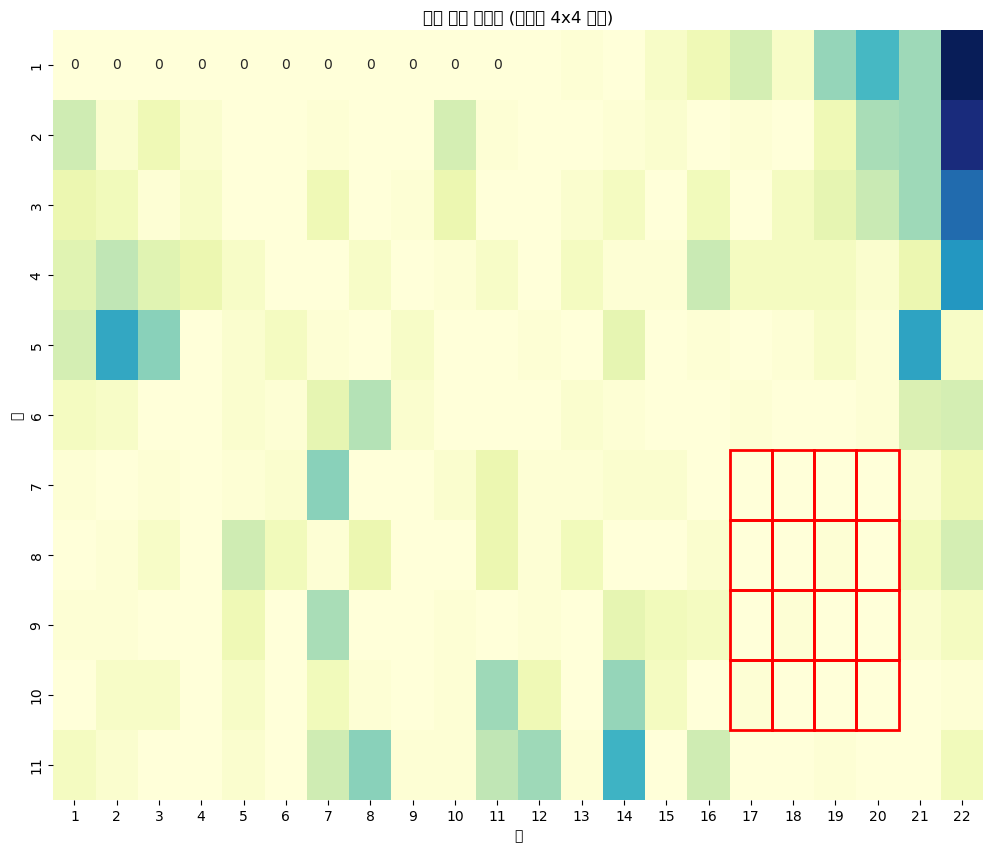

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 불러오기
data = pd.read_csv('data_fin.csv')
data["judge"] = data["judge"].map(lambda x : 0 if x == "양품" else 1)

# 불량 데이터 필터링
defective_data = data[data['judge'] == 1]

# 피벗 테이블 생성
heatmap_data = defective_data.pivot_table(index='c1_box_dan', columns='c1_box_col', aggfunc='size', fill_value=0)

# 열과 단을 숫자로 변환하여 처리
heatmap_data.columns = heatmap_data.columns.map(lambda x: int(x.split('열')[0]))
heatmap_data.index = heatmap_data.index.map(lambda x: int(x.split('단')[0]))

# 불량률이 가장 낮은 4x4 구간 찾기
min_defects = float('inf')
min_coords = (0, 0)

# 4x4 구간의 합계를 계산
for i in range(len(heatmap_data) - 3):
    for j in range(len(heatmap_data.columns) - 3):
        defects_sum = heatmap_data.iloc[i:i+4, j:j+4].sum().sum()
        if defects_sum < min_defects:
            min_defects = defects_sum
            min_coords = (i, j)

highlight = min_coords

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar=False, annot_kws={"size": 10})

# 4x4 박스 그리기
for i in range(highlight[0], highlight[0] + 4):
    for j in range(highlight[1], highlight[1] + 4):
        plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', lw=2))

plt.title('불량 개수 히트맵 (강조된 4x4 구간)')
plt.xlabel('열')
plt.ylabel('단')
plt.show()


# 불량 개수가 가장 많은 위치
시작 위치: 1단 19열  
끝 위치: 4단 22열

# 중앙 구역

시작위치 5단 10열  
끝 위치 9단 13열

# 불량개수 많은 구역(첫번째 구역)

In [15]:
import pandas as pd
import numpy as np

# 데이터 불러오기
data = pd.read_csv('data_fin.csv')
data["judge"] = data["judge"].map(lambda x : 0 if x == "양품" else 1)

# 데이터의 첫 몇 행을 표시하여 구조를 이해합니다.
data.head()


,lot_id,tray_id,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,c2_tat,dc2_tat,...,sa3_box_row,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an
0,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3759.6,5.0,6.8,4709.0,37583.0,92.0,626.0,109.0
1,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3760.4,5.1,6.8,4712.0,37591.0,92.0,606.0,5.0
2,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3760.4,4.9,6.7,4737.0,37594.0,92.0,566.0,-10.0
3,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3759.0,5.1,6.9,4709.0,37578.0,92.0,606.0,111.0
4,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3759.0,5.0,6.7,4706.0,37577.0,93.0,606.0,-38.0


In [16]:
# 'c1_box_col'과 'c1_box_dan'을 비교를 위해 숫자 값으로 변환합니다.
data['c1_box_col_numeric'] = data['c1_box_col'].str.extract('(\d+)').astype(int)
data['c1_box_dan_numeric'] = data['c1_box_dan'].str.extract('(\d+)').astype(int)

In [17]:
# 첫번째 구역의 범위를 정의합니다.
first_section = data[
    (data['c1_box_col_numeric'] >= 19) &
    (data['c1_box_col_numeric'] <= 22) &
    (data['c1_box_dan_numeric'] >= 1) &
    (data['c1_box_dan_numeric'] <= 4)
]

# 필터링된 데이터의 첫 몇 행을 출력합니다.
first_section.head()

,lot_id,tray_id,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,c2_tat,dc2_tat,...,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an,c1_box_col_numeric,c1_box_dan_numeric
1417,LOT-102,TRAY-1080,216944,86711,46836,118,3547,404,461,404,...,3759.8,5.3,7.1,4748.0,37589.0,94.0,567.0,130.0,20,4
1418,LOT-102,TRAY-1080,216944,86711,46836,118,3547,404,461,404,...,3759.4,5.2,7.0,4702.0,37583.0,92.0,609.0,28.0,20,4
1419,LOT-102,TRAY-1080,216944,86711,46836,118,3547,404,461,404,...,3758.9,5.1,6.9,4729.0,37580.0,94.0,567.0,177.0,20,4
1420,LOT-102,TRAY-1080,216944,86711,46836,118,3547,404,461,404,...,3760.0,5.2,7.0,4728.0,37589.0,93.0,609.0,51.0,20,4
1421,LOT-102,TRAY-1080,216944,86711,46836,118,3547,404,461,404,...,3759.8,5.2,7.0,4724.0,37587.0,92.0,609.0,-27.0,20,4


# 중앙구역(두번째 구역)

In [24]:
# 두번째 구역으로 범위 재정의: 5단 10열부터 9단 13열까지
second_section = data[
    (data['c1_box_col_numeric'] >= 9) &
    (data['c1_box_col_numeric'] <= 13) &
    (data['c1_box_dan_numeric'] >= 5) &
    (data['c1_box_dan_numeric'] <= 10)
]

# 두번째 구역 필터링된 데이터의 첫 몇 행을 출력합니다.
second_section.head()

,lot_id,tray_id,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,c2_tat,dc2_tat,...,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an,c1_box_col_numeric,c1_box_dan_numeric
75,LOT-100,TRAY-1007,217901,86481,4978,119,3558,405,459,405,...,3759.7,5.1,6.9,4731.0,37587.0,94.0,566.0,903.0,10,7
76,LOT-100,TRAY-1007,217901,86481,4978,119,3558,405,459,405,...,3759.3,5.1,6.8,4721.0,37582.0,94.0,566.0,62.0,10,7
77,LOT-100,TRAY-1007,217901,86481,4978,119,3558,405,459,405,...,3758.7,5.1,6.8,4699.0,37575.0,91.0,587.0,100.0,10,7
78,LOT-100,TRAY-1007,217901,86481,4978,119,3558,405,459,405,...,3758.7,5.0,6.7,4715.0,37577.0,94.0,546.0,169.0,10,7
79,LOT-100,TRAY-1007,217901,86481,4978,119,3558,405,459,405,...,3758.8,5.1,6.8,4699.0,37576.0,92.0,587.0,-103.0,10,7


# 구역별 변수 비교

In [19]:
# 비교하고자 하는 변수 목록
variables_to_compare = [
    'c1_curr_end', 'c1_voltage_avg', 'c1_capa', 'c1_ccval',
    'c1_time_cc', 'c1_temp_avg'
]

# 각 변수에 대한 비교 결과를 저장할 데이터프레임 생성
comparison_results = pd.DataFrame()

# 각 변수를 순회하면서 통계 비교 수행
for var in variables_to_compare:
    first_section_var = first_section[var]
    second_section_var = second_section[var]
    
    comparison = pd.DataFrame({
        'First Section': first_section_var.describe(),
        'Second Section': second_section_var.describe()
    })
    
    # 비교 결과를 통합
    comparison_results = pd.concat([comparison_results, comparison], axis=1)

comparison_results


,First Section,Second Section,First Section,Second Section,First Section,Second Section,First Section,Second Section,First Section,Second Section,First Section,Second Section
count,2675.000000,4061.000000,2675.000000,4061.000000,2675.000000,4061.000000,2675.000000,4061.000000,2675.000000,4061.000000,2675.000000,4061.000000
mean,6800.280000,6799.825659,3780.520374,3779.718542,6451.703925,6474.570057,6451.703925,6474.570057,3417.555140,3429.887466,258.964486,287.627432
std,1.603017,1.515971,2.305536,1.082928,34.860066,23.789736,34.860066,23.789736,18.432584,12.607504,9.973631,7.707576
min,6794.000000,6795.000000,3776.000000,3771.000000,5871.000000,6383.000000,5871.000000,6383.000000,3110.000000,3381.000000,232.000000,271.000000
25%,6799.000000,6799.000000,3780.000000,3779.000000,6437.000000,6460.000000,6437.000000,6460.000000,3410.000000,3422.000000,254.000000,282.000000
50%,6800.000000,6800.000000,3780.000000,3780.000000,6454.000000,6475.000000,6454.000000,6475.000000,3419.000000,3430.000000,261.000000,288.000000
75%,6801.000000,6801.000000,3781.000000,3780.000000,6470.000000,6489.000000,6470.000000,6489.000000,3427.000000,3438.000000,267.000000,293.000000
max,6807.000000,6804.000000,3832.000000,3784.000000,6545.000000,6648.000000,6545.000000,6648.000000,3467.000000,3522.000000,282.000000,309.000000


In [20]:
# 각 변수를 별도로 비교할 수 있도록 함수 작성
def compare_variable(var_name):
    first_section_var = first_section[var_name]
    second_section_var = second_section[var_name]
    
    comparison = pd.DataFrame({
        'First Section': first_section_var.describe(),
        'Second Section': second_section_var.describe()
    })
    
    return comparison

# 각 변수를 비교한 결과를 저장
comparison_results = {var: compare_variable(var) for var in variables_to_compare}

comparison_results


{'c1_curr_end':        First Section  Second Section
 count    2675.000000     4061.000000
 mean     6800.280000     6799.825659
 std         1.603017        1.515971
 min      6794.000000     6795.000000
 25%      6799.000000     6799.000000
 50%      6800.000000     6800.000000
 75%      6801.000000     6801.000000
 max      6807.000000     6804.000000,
 'c1_voltage_avg':        First Section  Second Section
 count    2675.000000     4061.000000
 mean     3780.520374     3779.718542
 std         2.305536        1.082928
 min      3776.000000     3771.000000
 25%      3780.000000     3779.000000
 50%      3780.000000     3780.000000
 75%      3781.000000     3780.000000
 max      3832.000000     3784.000000,
 'c1_capa':        First Section  Second Section
 count    2675.000000     4061.000000
 mean     6451.703925     6474.570057
 std        34.860066       23.789736
 min      5871.000000     6383.000000
 25%      6437.000000     6460.000000
 50%      6454.000000     6475.000000
 75%

# 구역별 변수 비교 시각화  
## (첫번째 구역 : 불량개수 많음 / 두번째 구역 : 중앙구역)

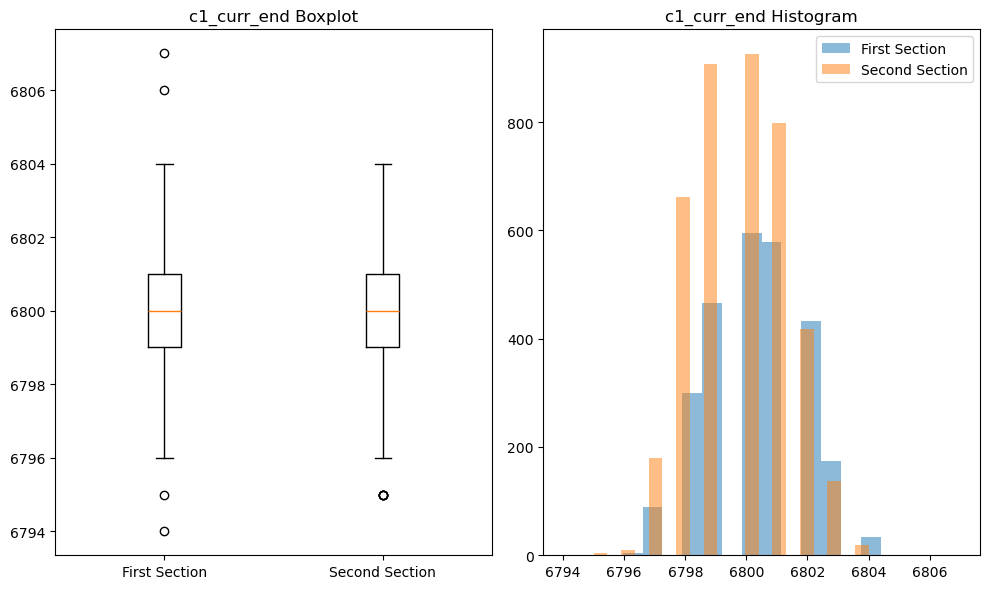

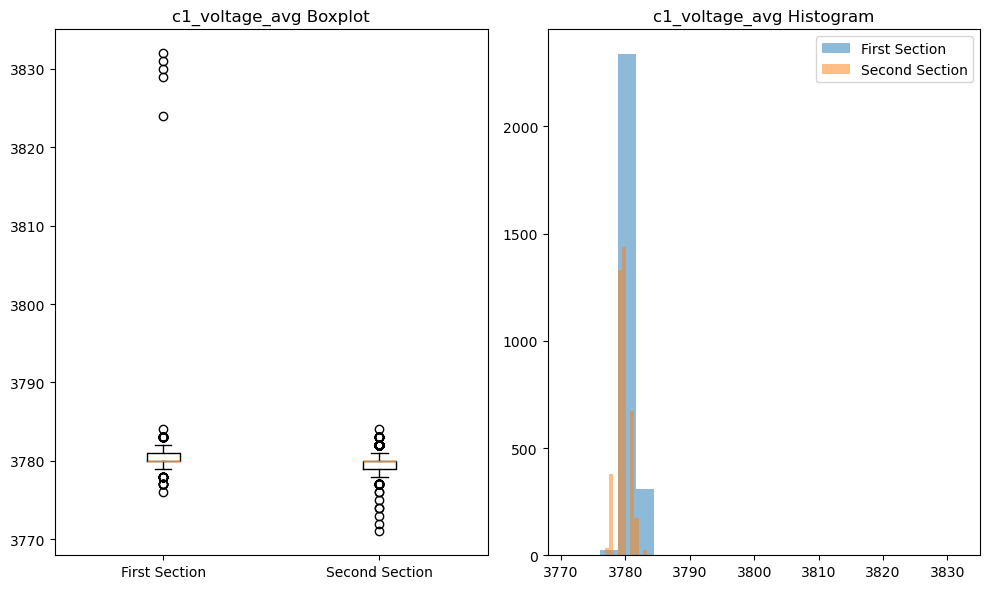

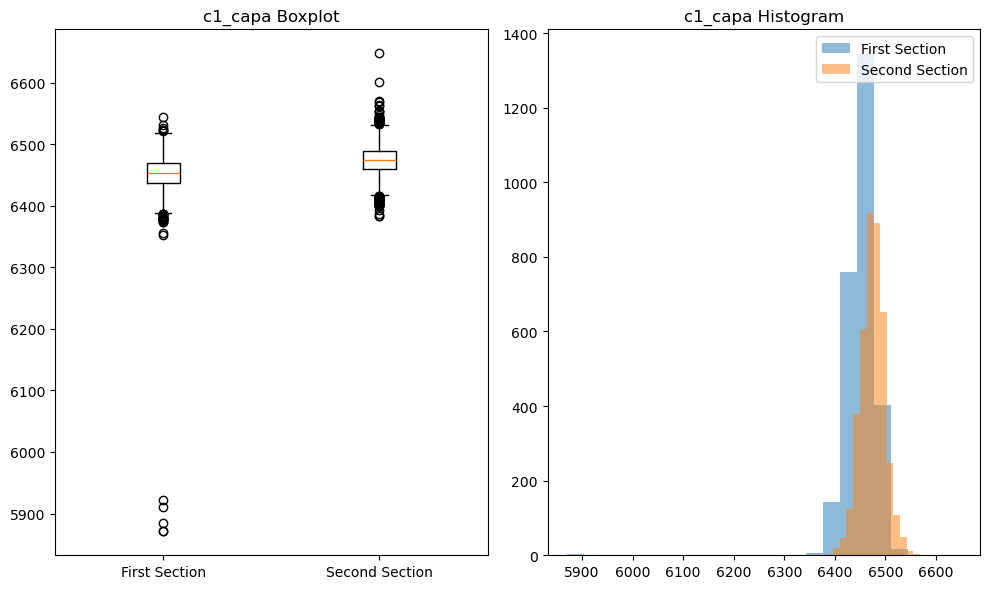

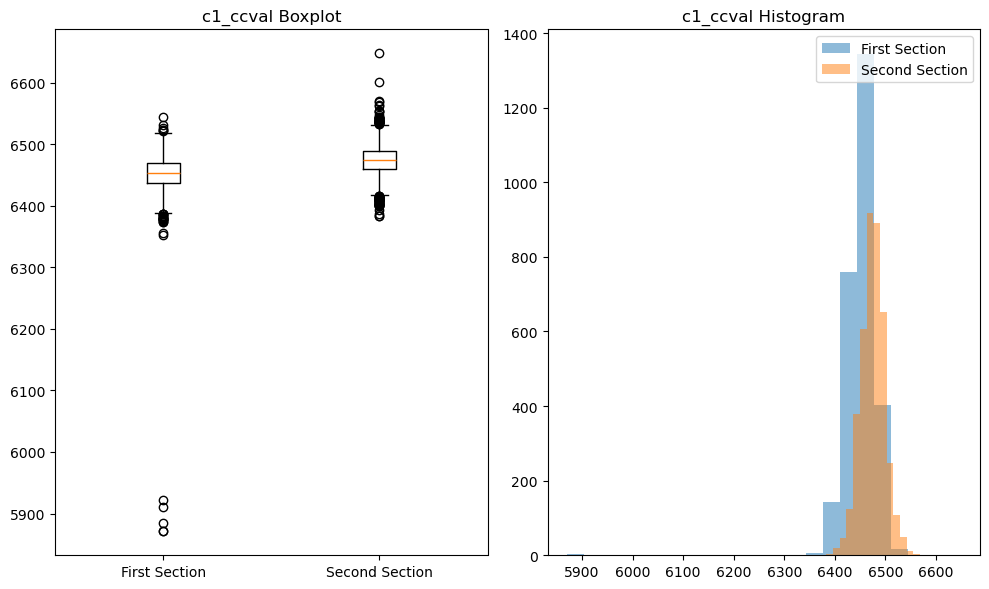

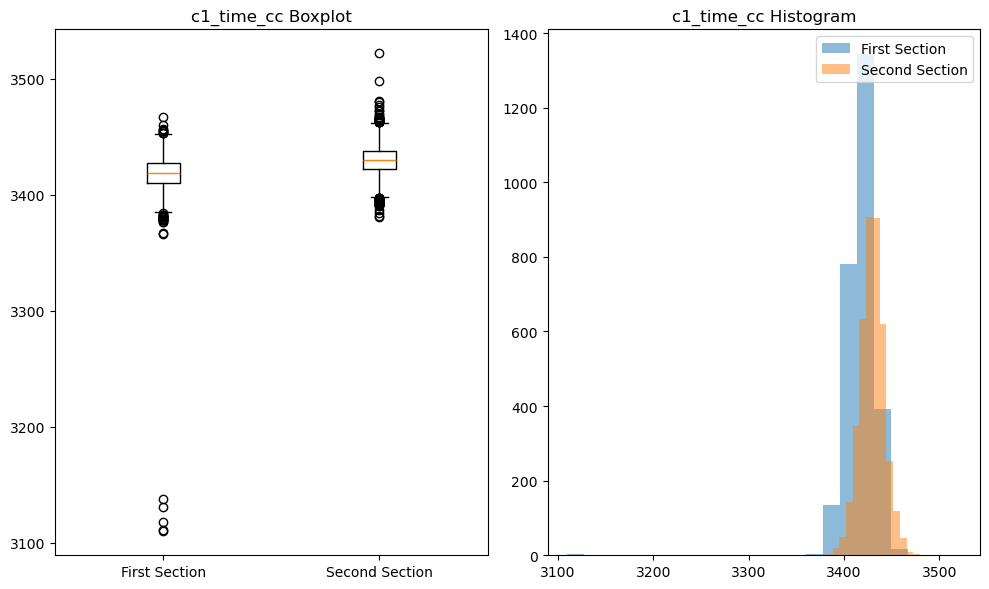

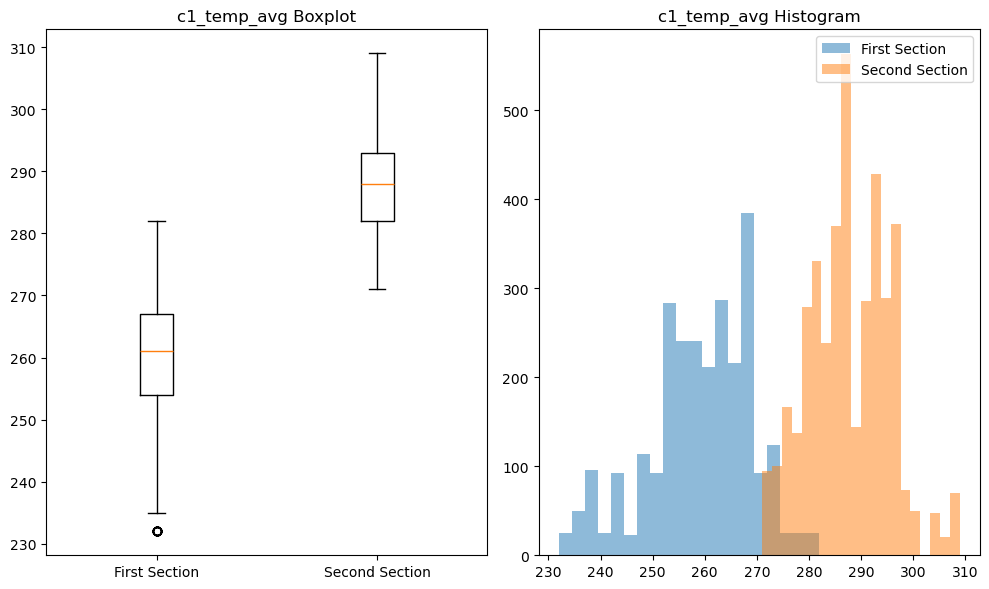

In [21]:
import matplotlib.pyplot as plt

# 시각화를 위한 함수 정의
def plot_comparison(var_name, first_section, second_section):
    first_section_var = first_section[var_name]
    second_section_var = second_section[var_name]
    
    plt.figure(figsize=(10, 6))
    
    # Boxplot for both sections
    plt.subplot(1, 2, 1)
    plt.boxplot([first_section_var, second_section_var], labels=['First Section', 'Second Section'])
    plt.title(f'{var_name} Boxplot')
    
    # Histogram for both sections
    plt.subplot(1, 2, 2)
    plt.hist(first_section_var, alpha=0.5, label='First Section', bins=20)
    plt.hist(second_section_var, alpha=0.5, label='Second Section', bins=20)
    plt.legend(loc='upper right')
    plt.title(f'{var_name} Histogram')
    
    plt.tight_layout()
    plt.show()

# 비교하고자 하는 각 변수에 대해 시각화 수행
for var in variables_to_compare:
    plot_comparison(var, first_section, second_section)


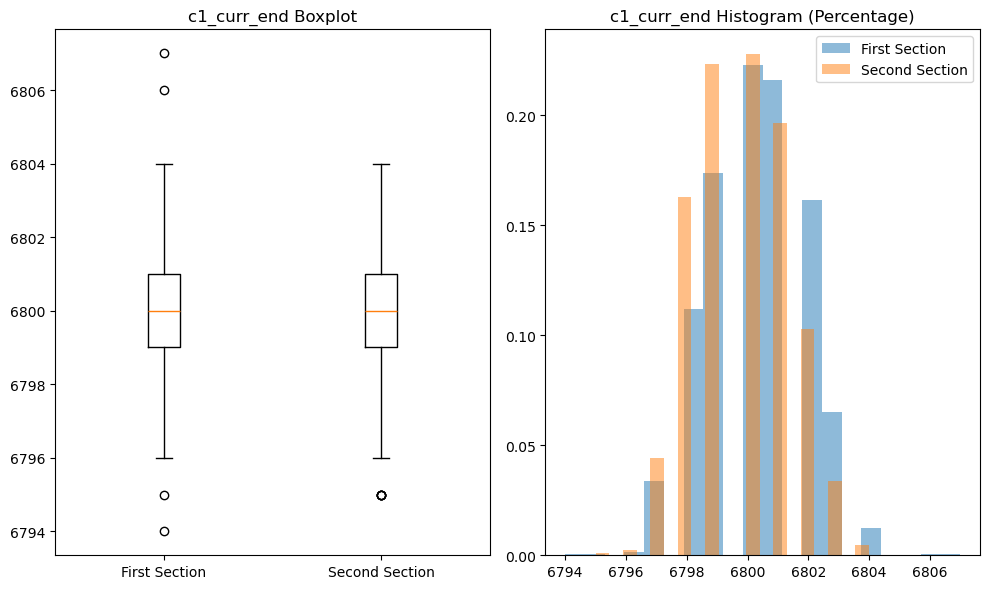

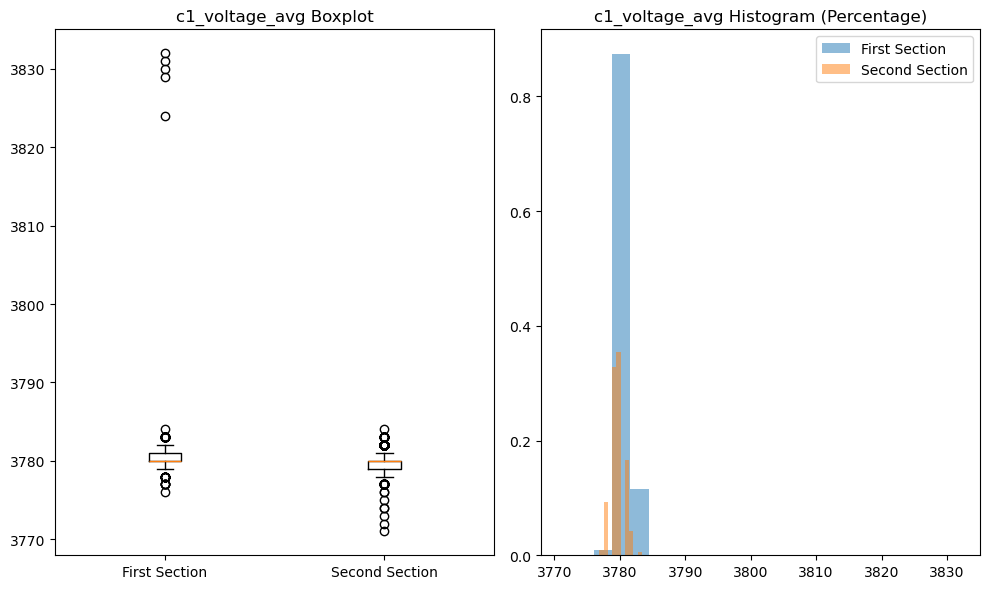

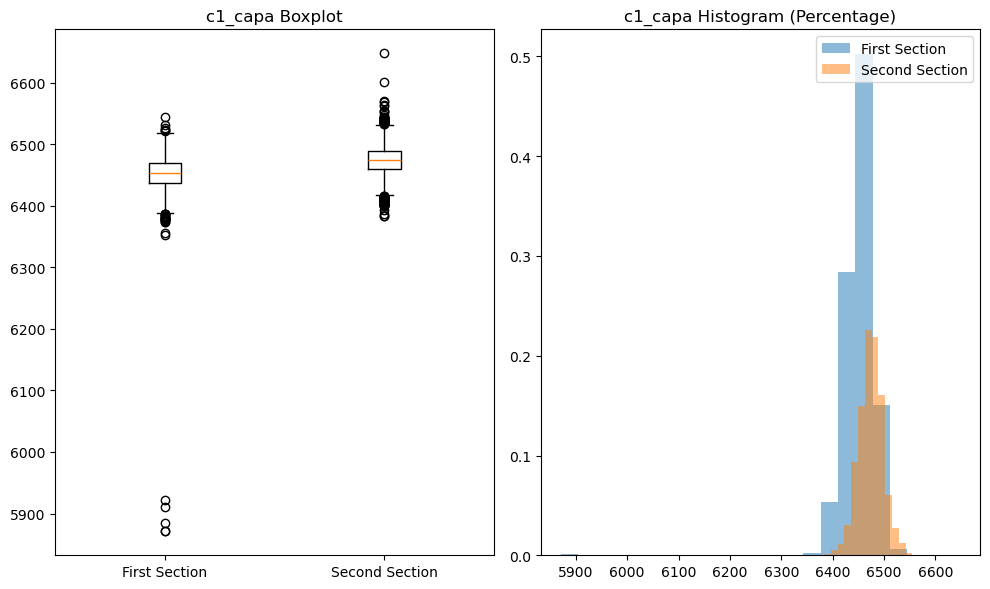

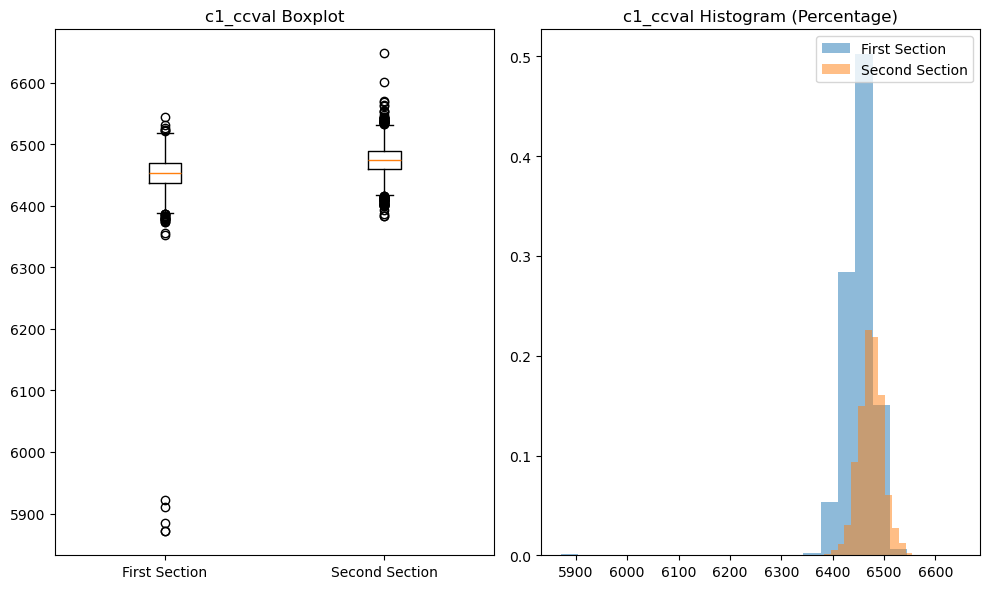

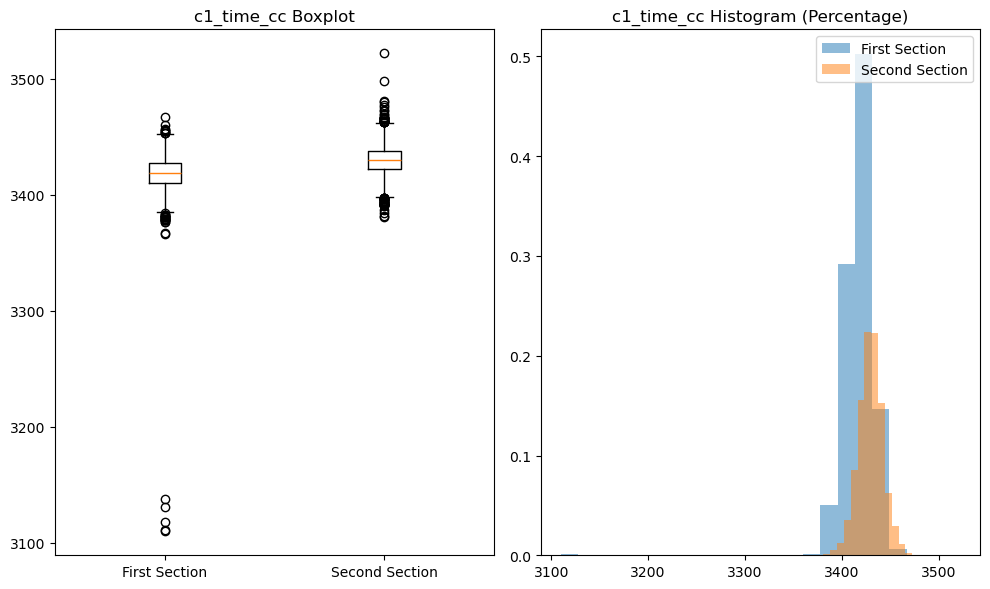

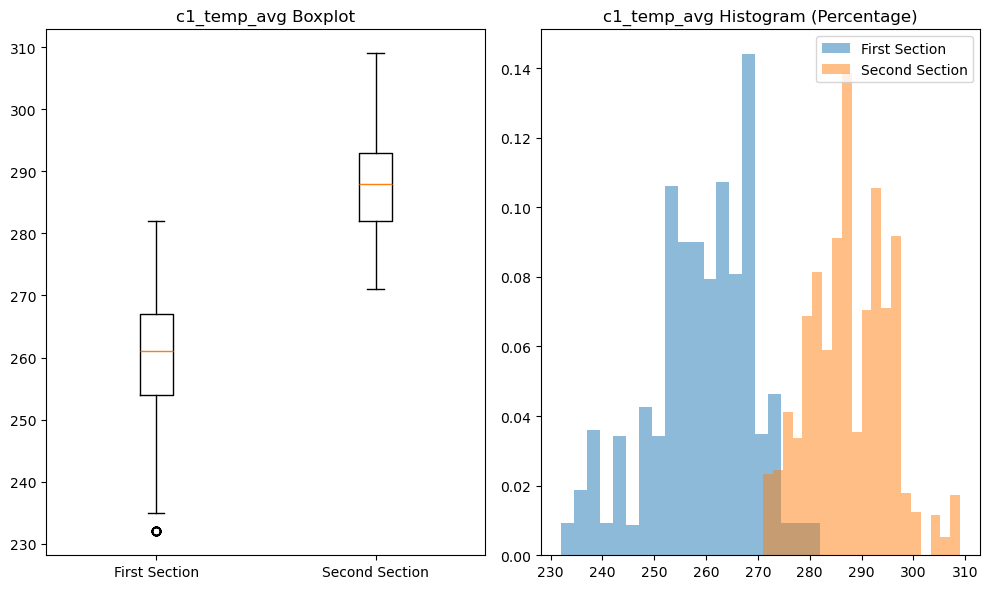

In [22]:
# 시각화를 위한 함수 정의
def plot_comparison_percentage(var_name, first_section, second_section):
    first_section_var = first_section[var_name]
    second_section_var = second_section[var_name]
    
    plt.figure(figsize=(10, 6))
    
    # Boxplot for both sections
    plt.subplot(1, 2, 1)
    plt.boxplot([first_section_var, second_section_var], labels=['First Section', 'Second Section'])
    plt.title(f'{var_name} Boxplot')
    
    # Histogram for both sections with percentage
    plt.subplot(1, 2, 2)
    first_counts, first_bins = np.histogram(first_section_var, bins=20)
    second_counts, second_bins = np.histogram(second_section_var, bins=20)
    
    first_percentage = first_counts / first_counts.sum()
    second_percentage = second_counts / second_counts.sum()
    
    plt.bar(first_bins[:-1], first_percentage, width=np.diff(first_bins), alpha=0.5, label='First Section', align='edge')
    plt.bar(second_bins[:-1], second_percentage, width=np.diff(second_bins), alpha=0.5, label='Second Section', align='edge')
    
    plt.legend(loc='upper right')
    plt.title(f'{var_name} Histogram (Percentage)')
    
    plt.tight_layout()
    plt.show()

# 비교하고자 하는 각 변수에 대해 시각화 수행
for var in variables_to_compare:
    plot_comparison_percentage(var, first_section, second_section)


C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


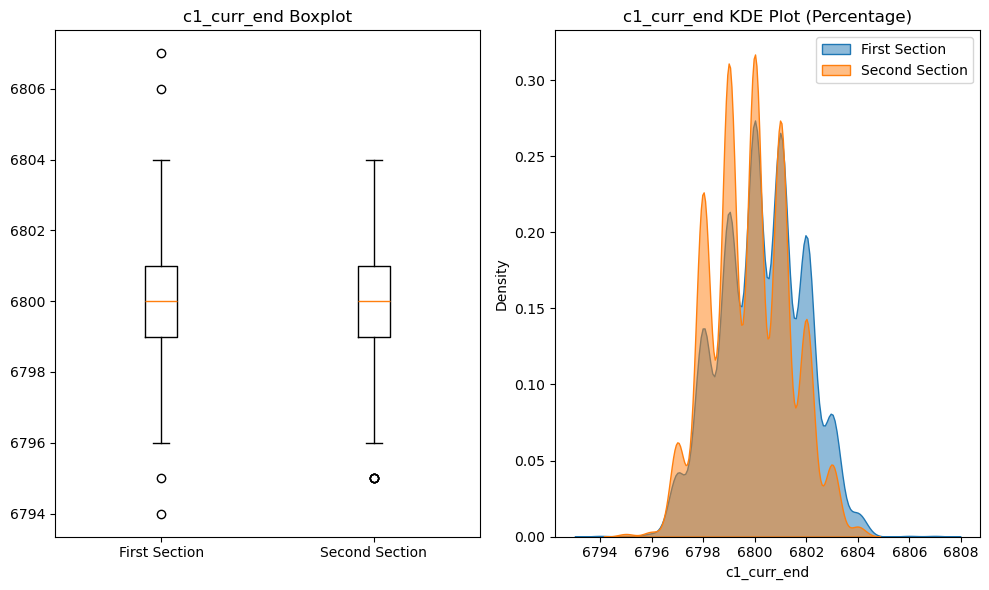

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


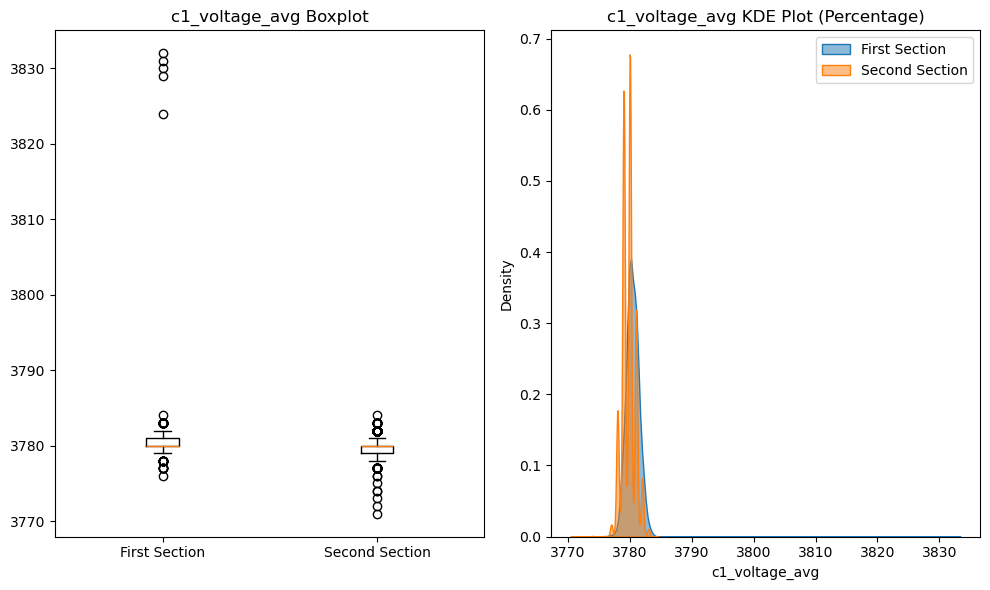

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


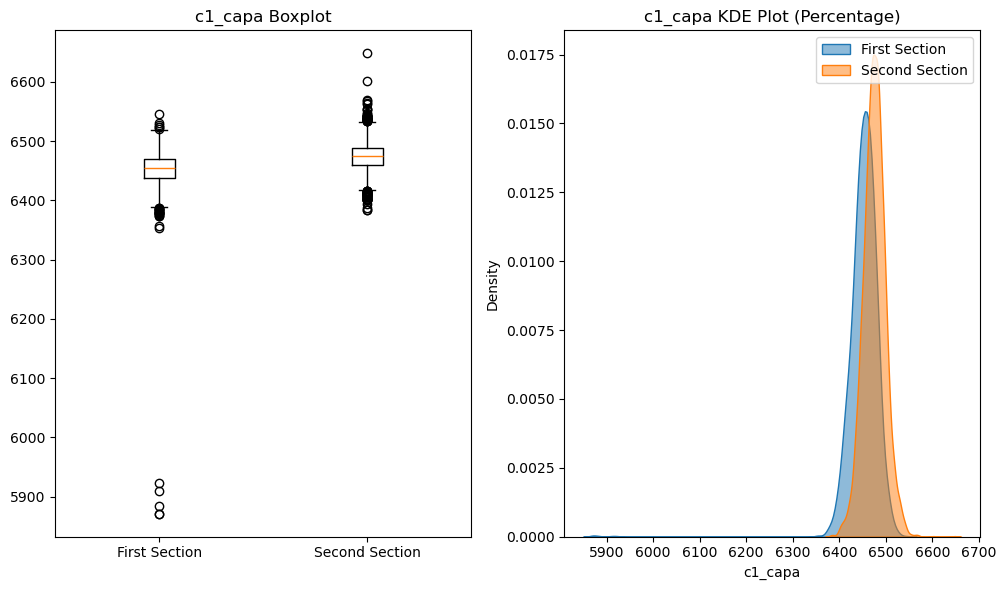

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


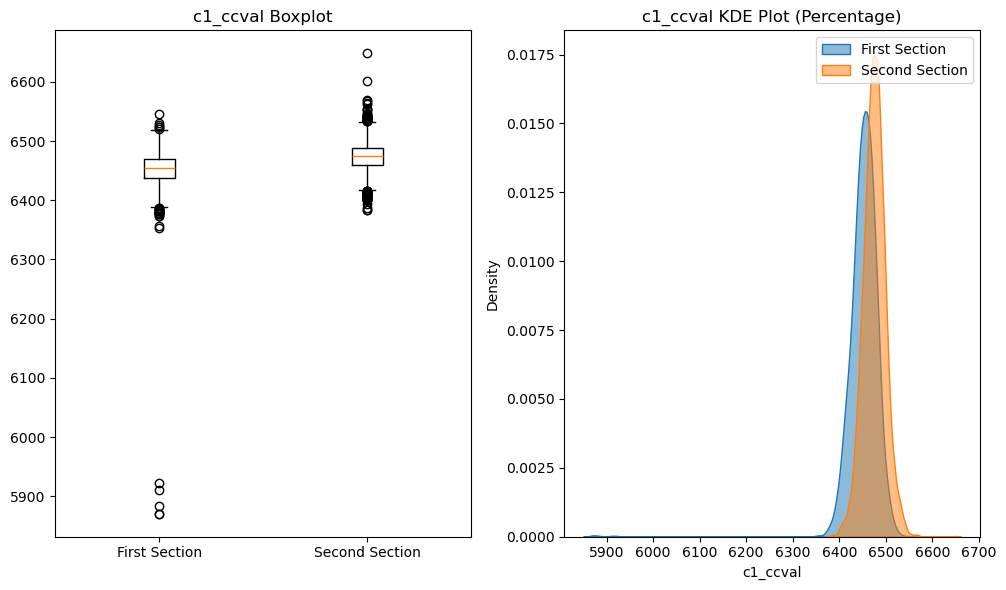

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


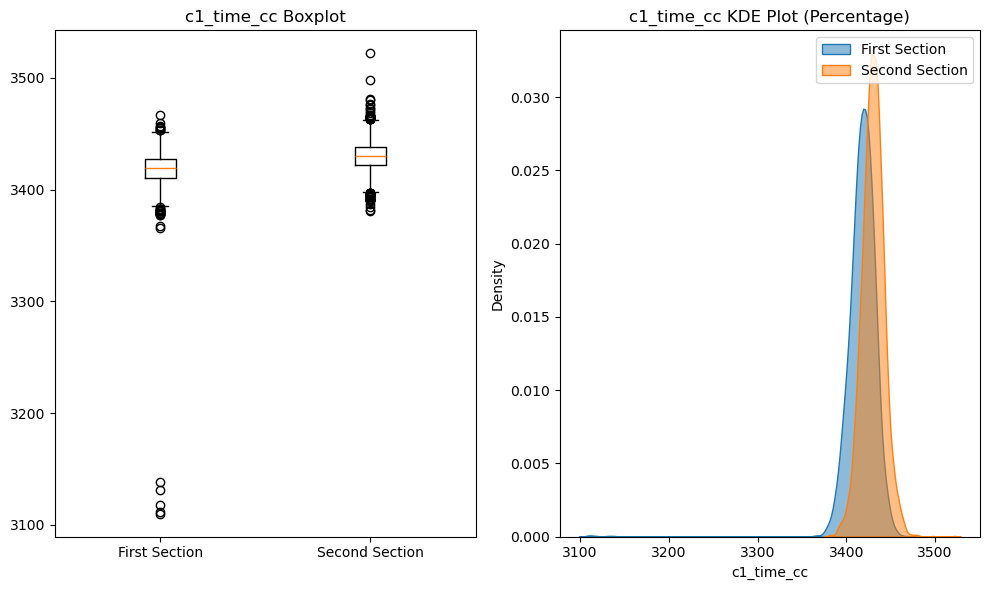

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


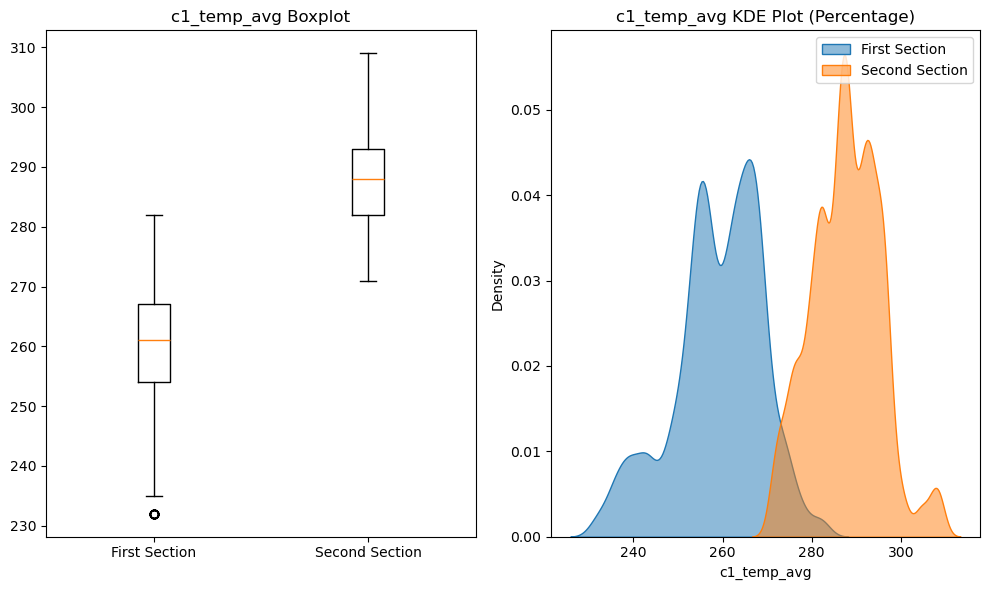

In [26]:
def plot_comparison_percentage(var_name, first_section, second_section):
    first_section_var = first_section[var_name]
    second_section_var = second_section[var_name]
    plt.figure(figsize=(10, 6))
    # Boxplot for both sections
    plt.subplot(1, 2, 1)
    plt.boxplot([first_section_var, second_section_var], labels=['First Section', 'Second Section'])
    plt.title(f'{var_name} Boxplot')
    # KDE plot for both sections
    plt.subplot(1, 2, 2)
    sns.kdeplot(first_section_var, label='First Section', fill=True, alpha=0.5)
    sns.kdeplot(second_section_var, label='Second Section', fill=True, alpha=0.5)
    plt.legend(loc='upper right')
    plt.title(f'{var_name} KDE Plot (Percentage)')
    plt.tight_layout()
    plt.show()
# 비교하고자 하는 각 변수에 대해 시각화 수행
for var in variables_to_compare:
    plot_comparison_percentage(var, first_section, second_section)

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


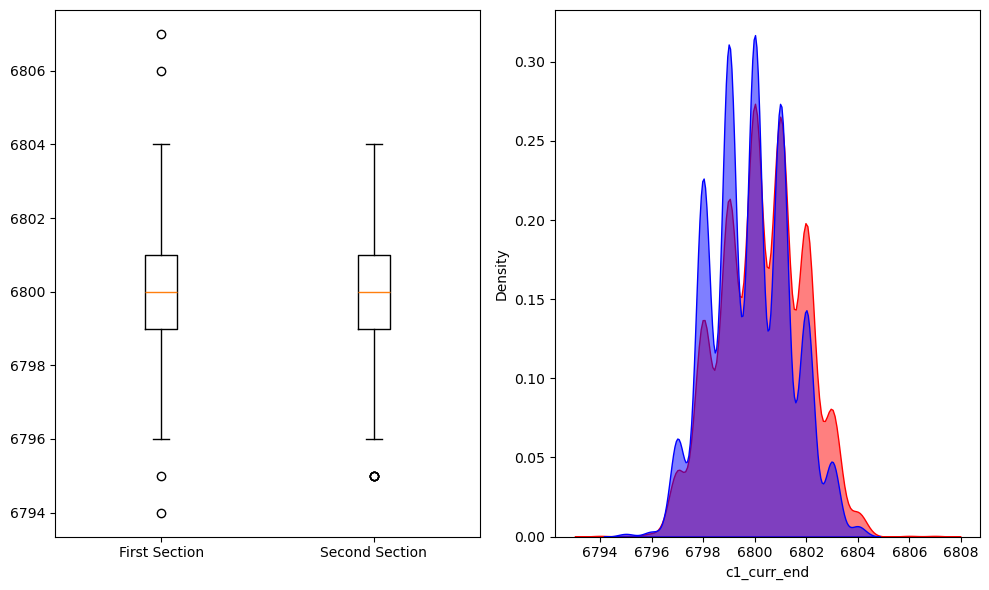

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


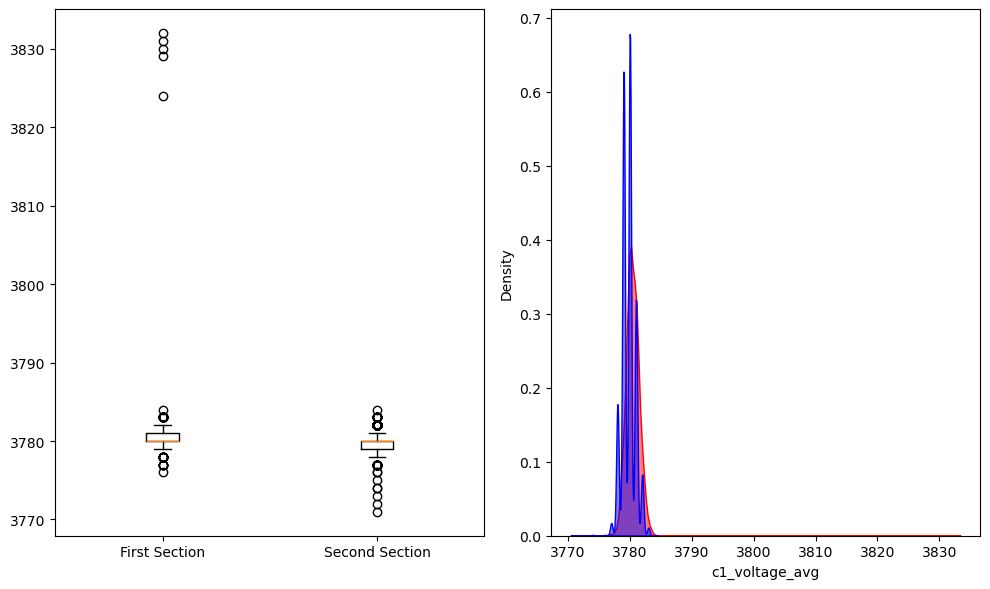

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


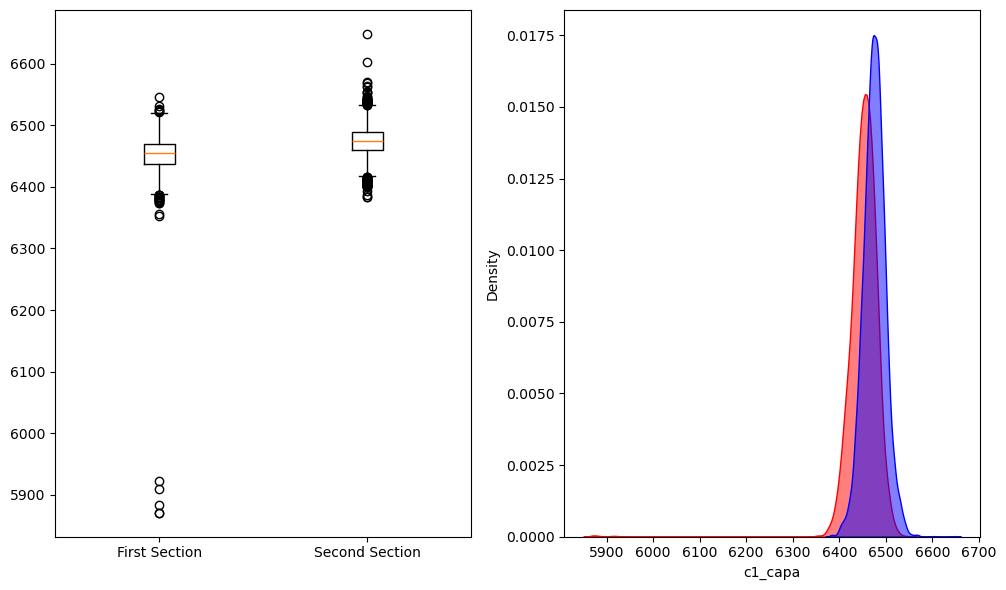

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


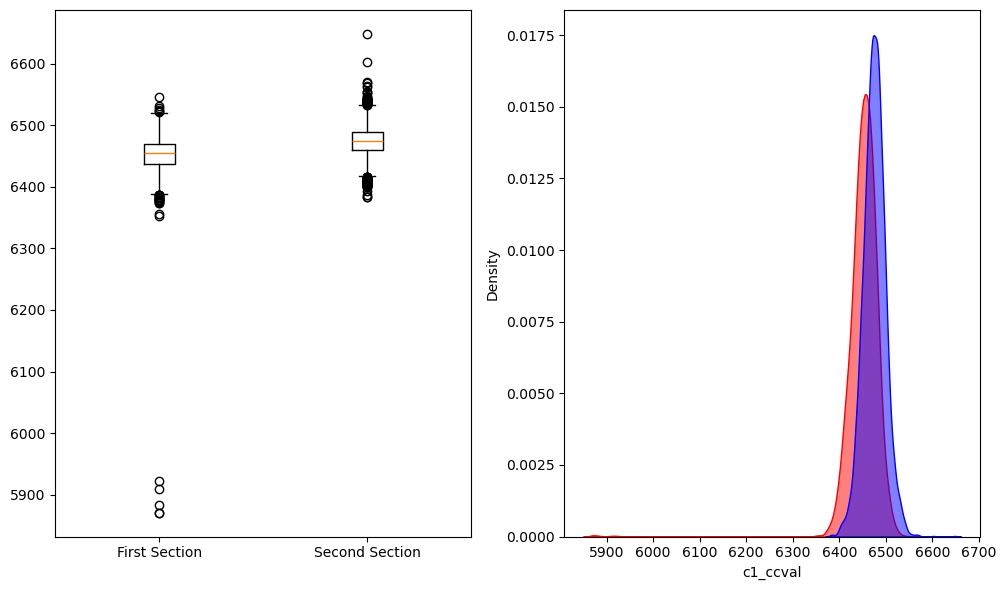

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


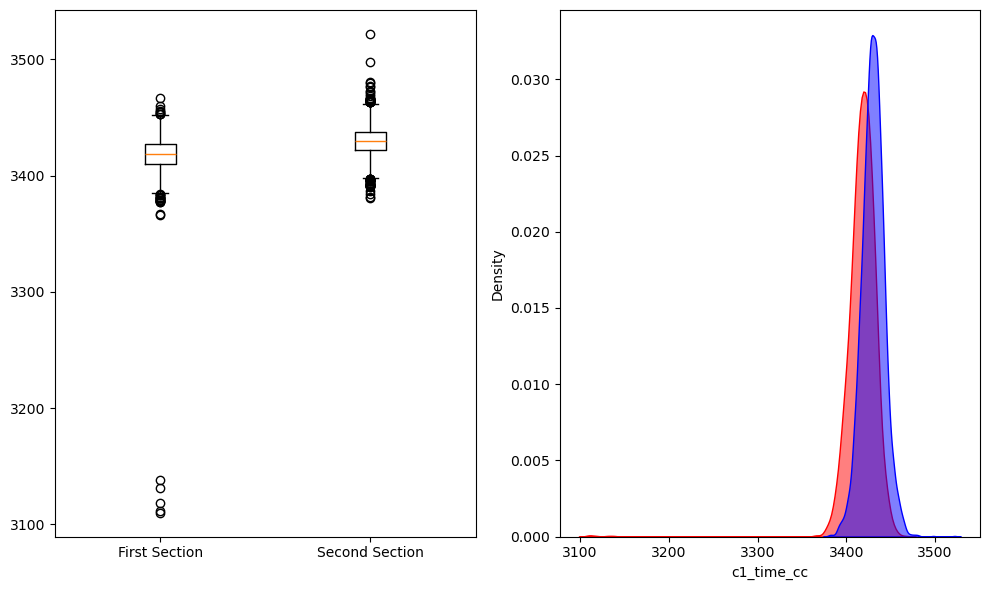

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


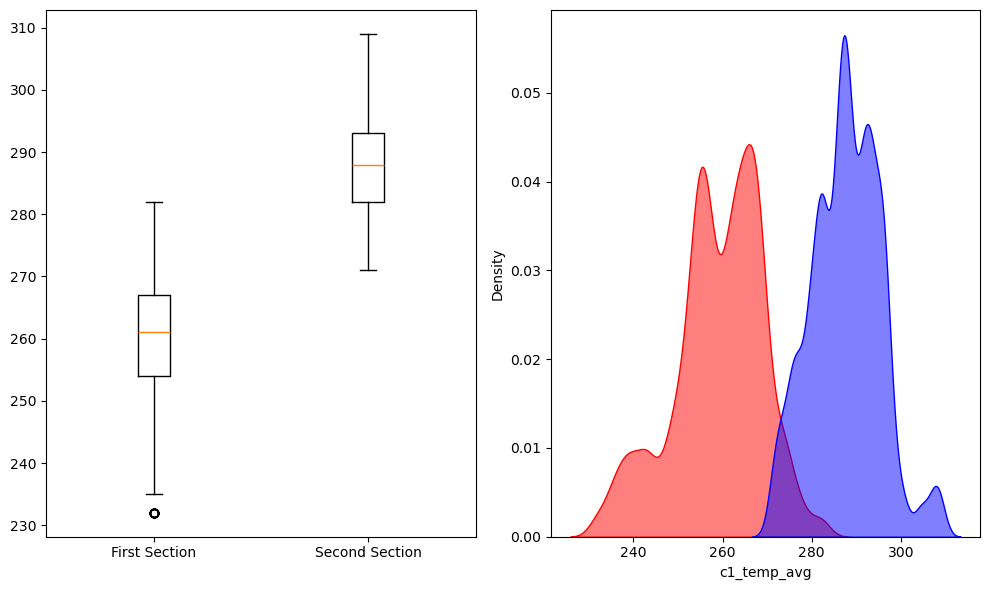

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_comparison_percentage(var_name, first_section, second_section, colors):
    first_section_var = first_section[var_name]
    second_section_var = second_section[var_name]
    
    plt.figure(figsize=(10, 6))
    
    # Boxplot for both sections
    plt.subplot(1, 2, 1)
    plt.boxplot([first_section_var, second_section_var])
    plt.xticks([1, 2], ['First Section', 'Second Section'])
    
    # KDE plot for both sections
    plt.subplot(1, 2, 2)
    sns.kdeplot(first_section_var, fill=True, alpha=0.5, color=colors[0])
    sns.kdeplot(second_section_var, fill=True, alpha=0.5, color=colors[1])
    
    plt.tight_layout()
    plt.show()

# 비교하고자 하는 각 변수에 대해 시각화 수행
colors = ['red', 'blue']  # 원하는 색상을 지정합니다.
for var in variables_to_compare:
    plot_comparison_percentage(var, first_section, second_section, colors)


C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


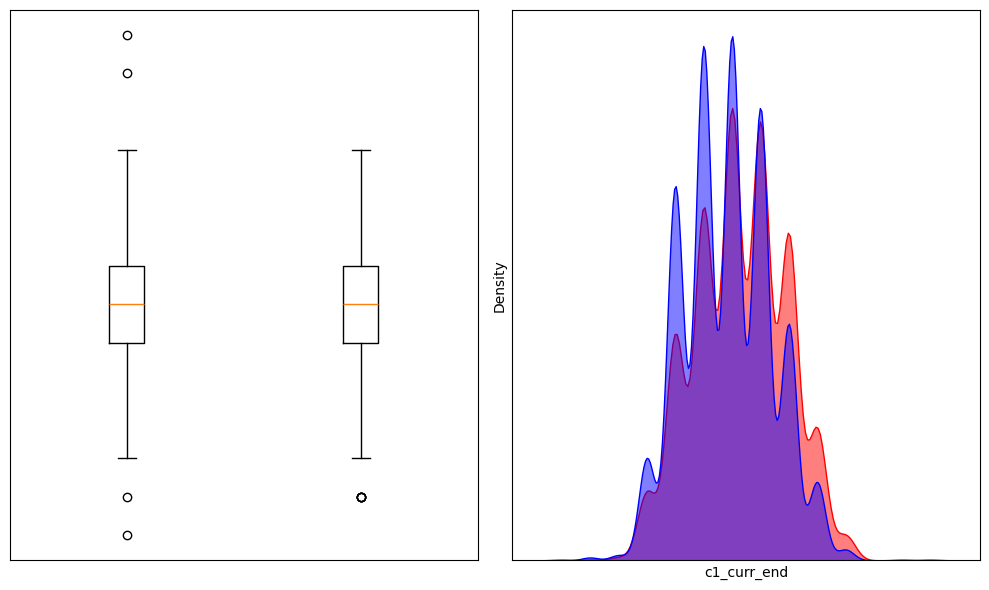

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


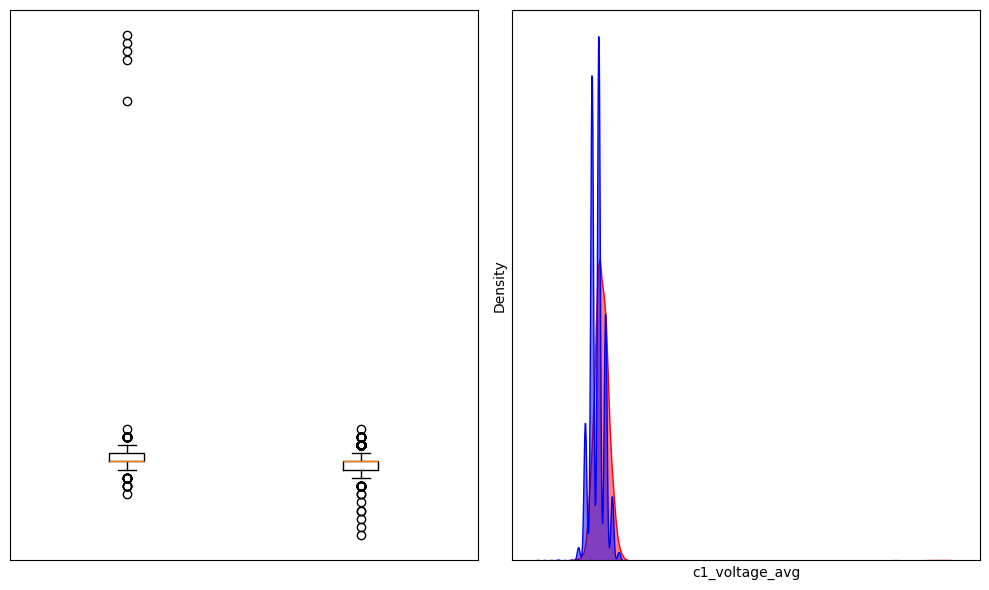

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


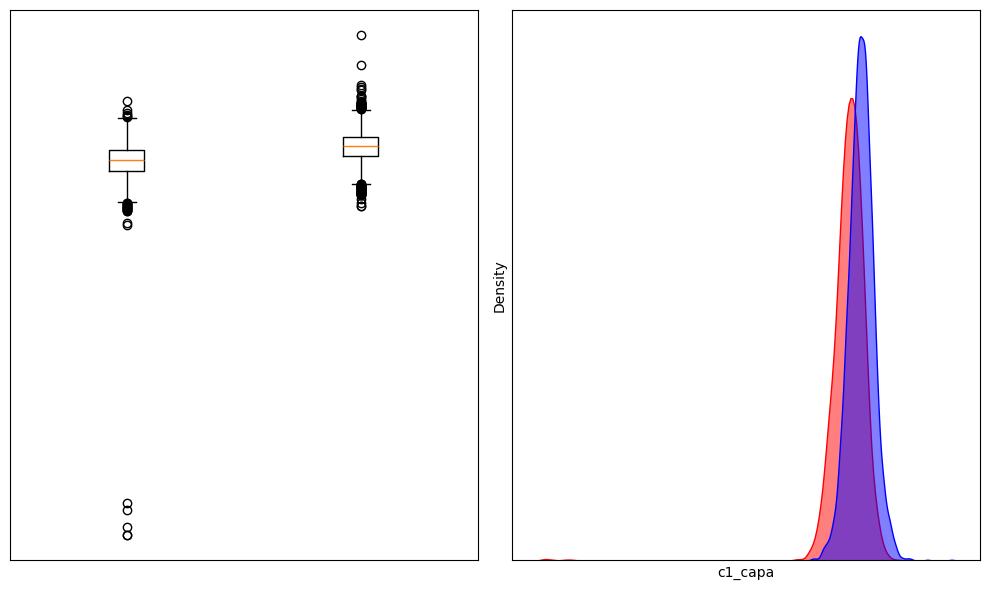

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


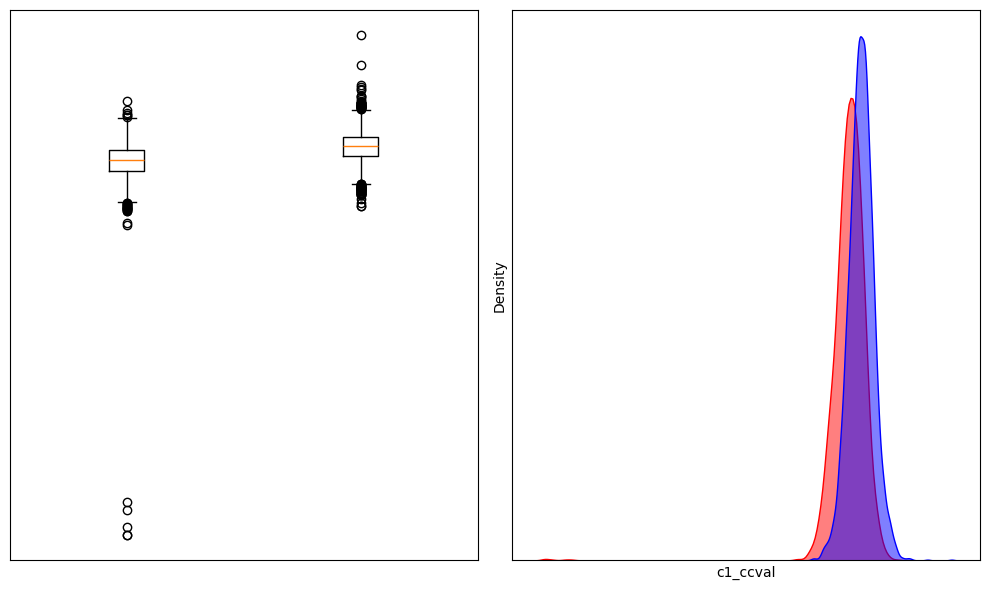

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


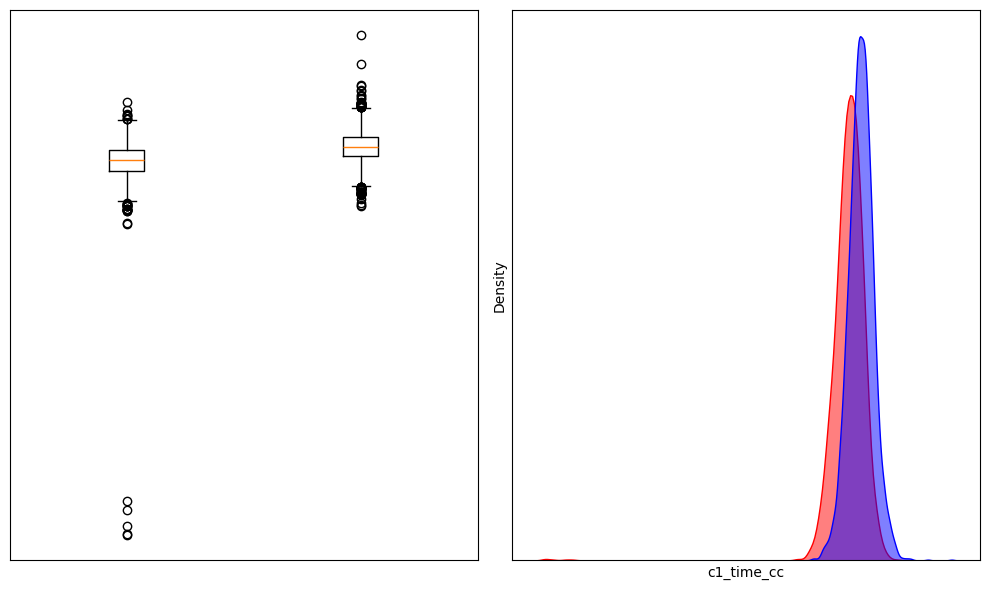

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


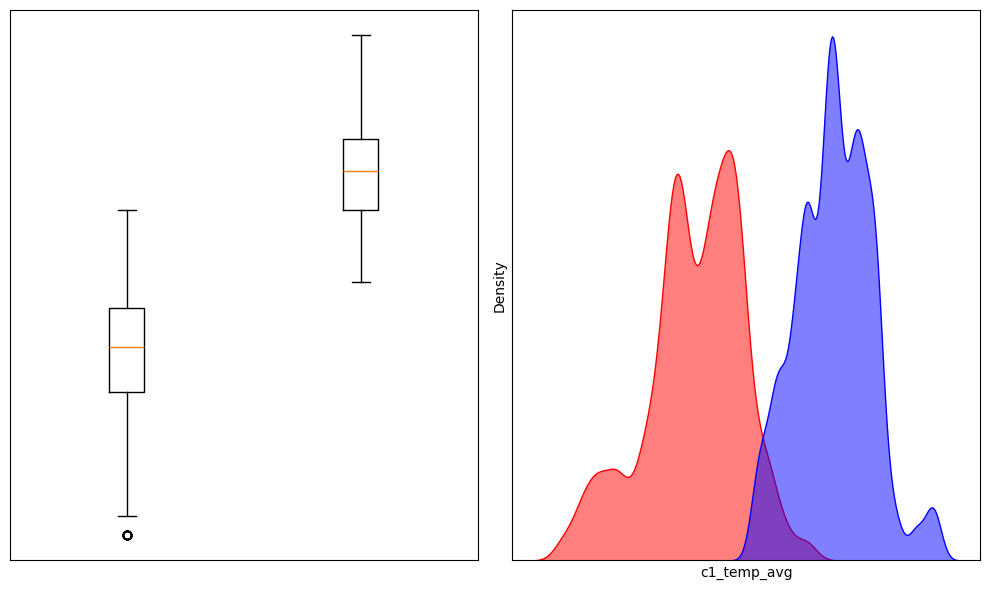

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_comparison_percentage(var_name, first_section, second_section, colors):
    first_section_var = first_section[var_name]
    second_section_var = second_section[var_name]
    
    plt.figure(figsize=(10, 6))
    
    # Boxplot for both sections
    ax1 = plt.subplot(1, 2, 1)
    plt.boxplot([first_section_var, second_section_var])
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    # KDE plot for both sections
    ax2 = plt.subplot(1, 2, 2)
    sns.kdeplot(first_section_var, fill=True, alpha=0.5, color=colors[0], ax=ax2)
    sns.kdeplot(second_section_var, fill=True, alpha=0.5, color=colors[1], ax=ax2)
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    plt.tight_layout()
    plt.show()

# 비교하고자 하는 각 변수에 대해 시각화 수행
colors = ['red', 'blue']  # 원하는 색상을 지정합니다.
for var in variables_to_compare:
    plot_comparison_percentage(var, first_section, second_section, colors)


C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


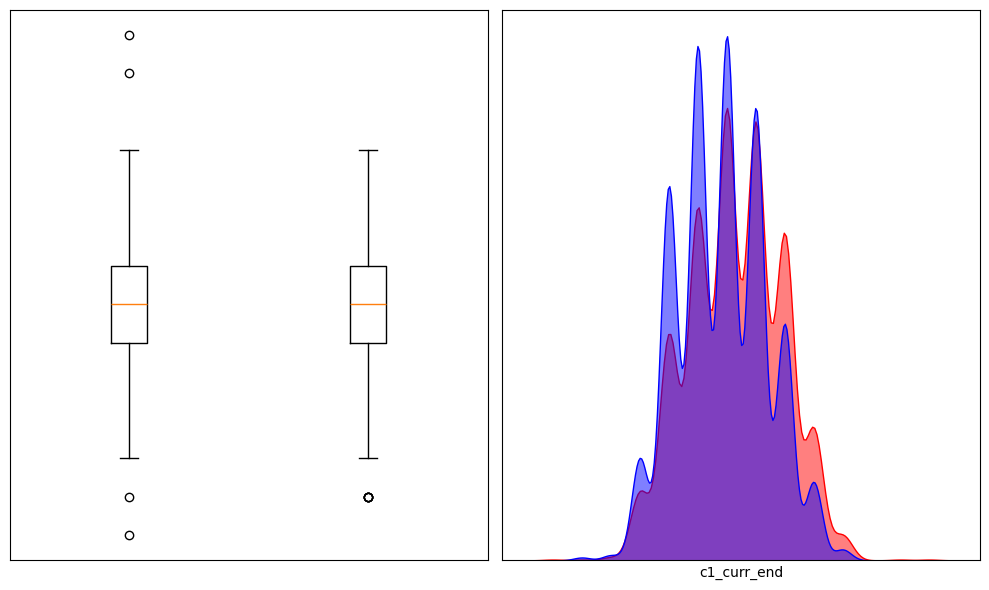

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


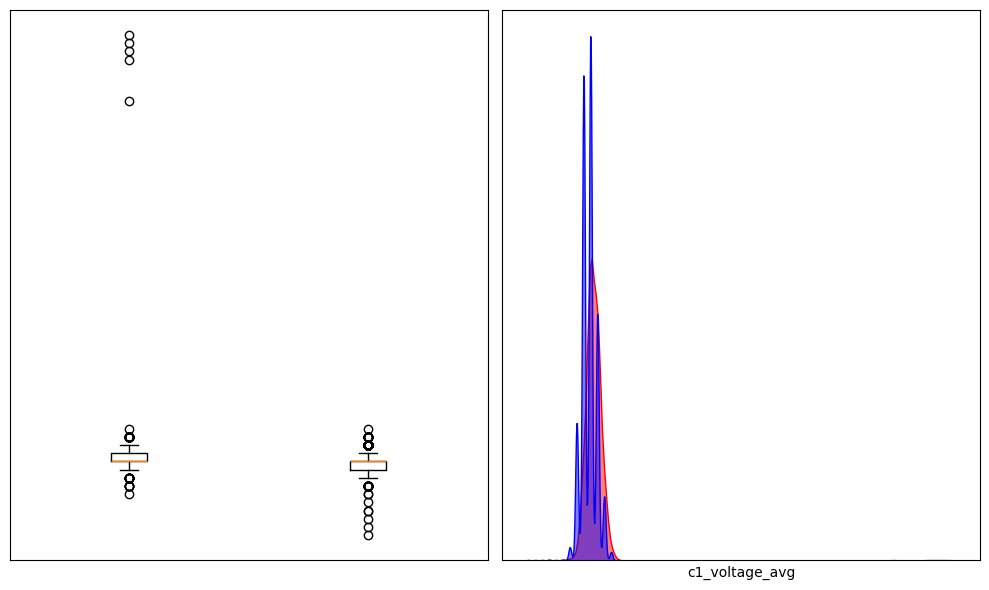

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


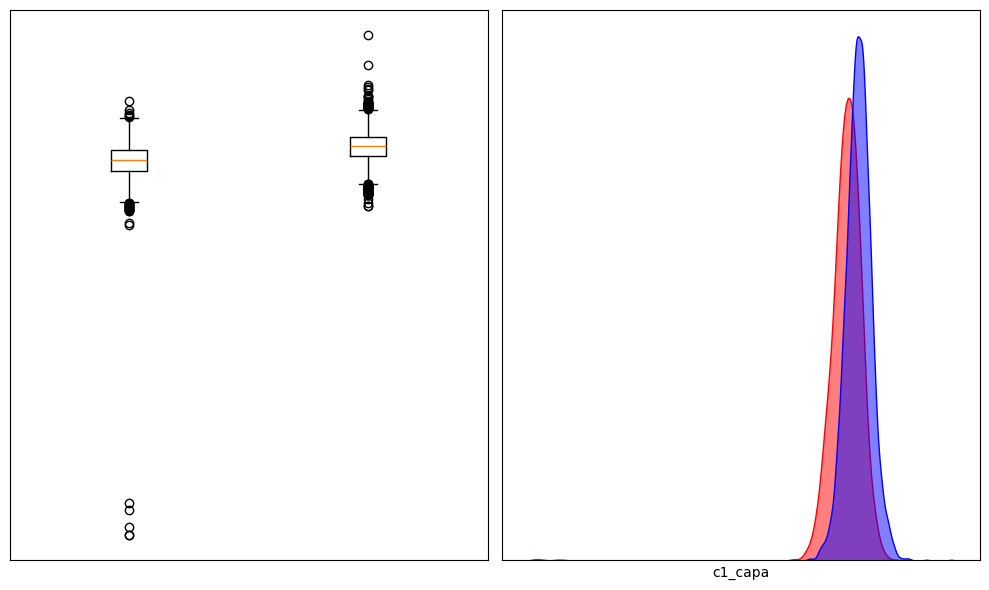

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


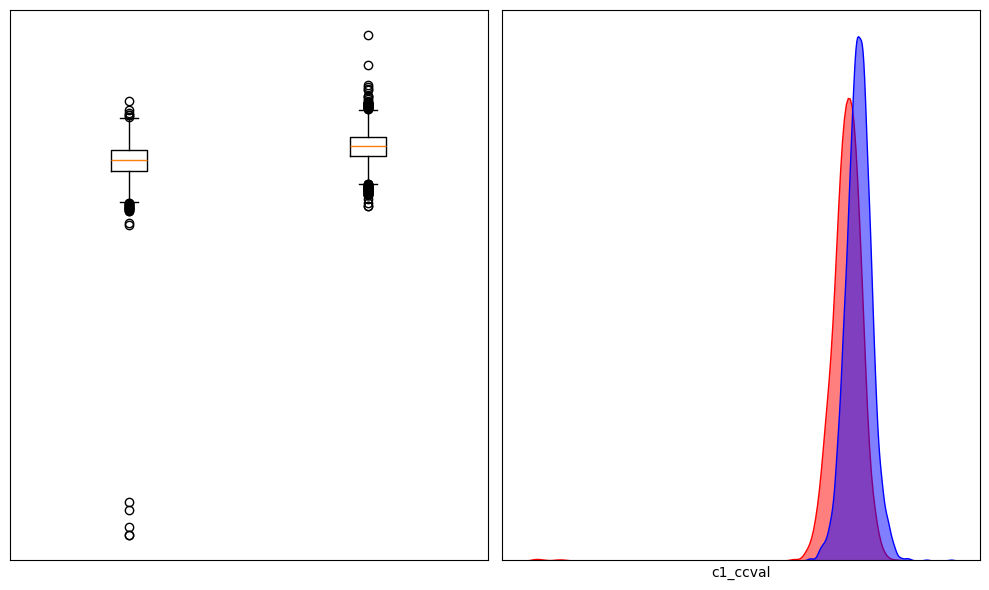

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


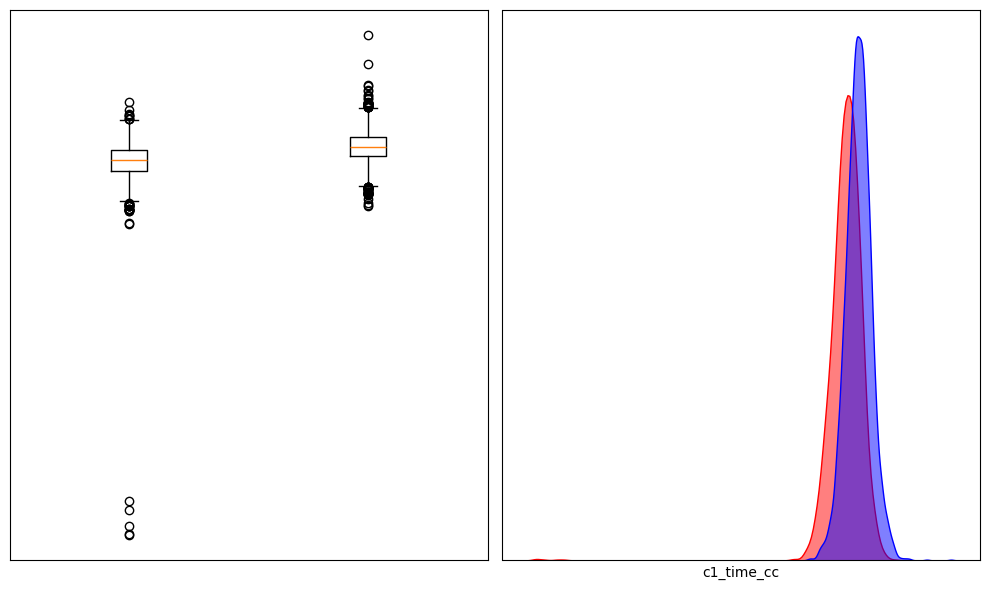

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


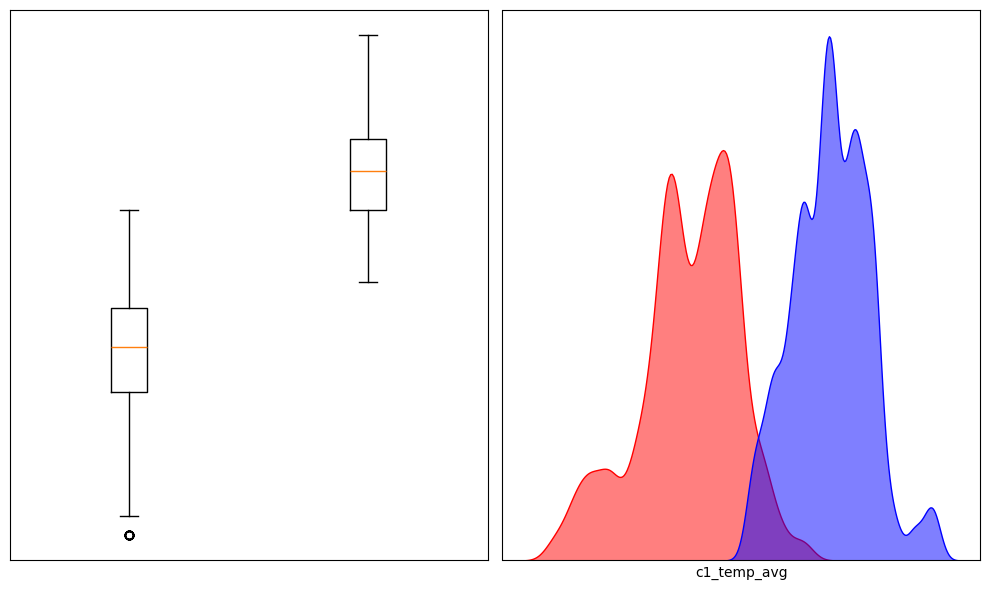

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_comparison_percentage(var_name, first_section, second_section, colors):
    first_section_var = first_section[var_name]
    second_section_var = second_section[var_name]
    
    plt.figure(figsize=(10, 6))
    
    # Boxplot for both sections
    ax1 = plt.subplot(1, 2, 1)
    plt.boxplot([first_section_var, second_section_var])
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    # KDE plot for both sections
    ax2 = plt.subplot(1, 2, 2)
    sns.kdeplot(first_section_var, fill=True, alpha=0.5, color=colors[0], ax=ax2)
    sns.kdeplot(second_section_var, fill=True, alpha=0.5, color=colors[1], ax=ax2)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_ylabel('')
    
    plt.tight_layout()
    plt.show()

# 비교하고자 하는 각 변수에 대해 시각화 수행
colors = ['red', 'blue']  # 원하는 색상을 지정합니다.
for var in variables_to_compare:
    plot_comparison_percentage(var, first_section, second_section, colors)



C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


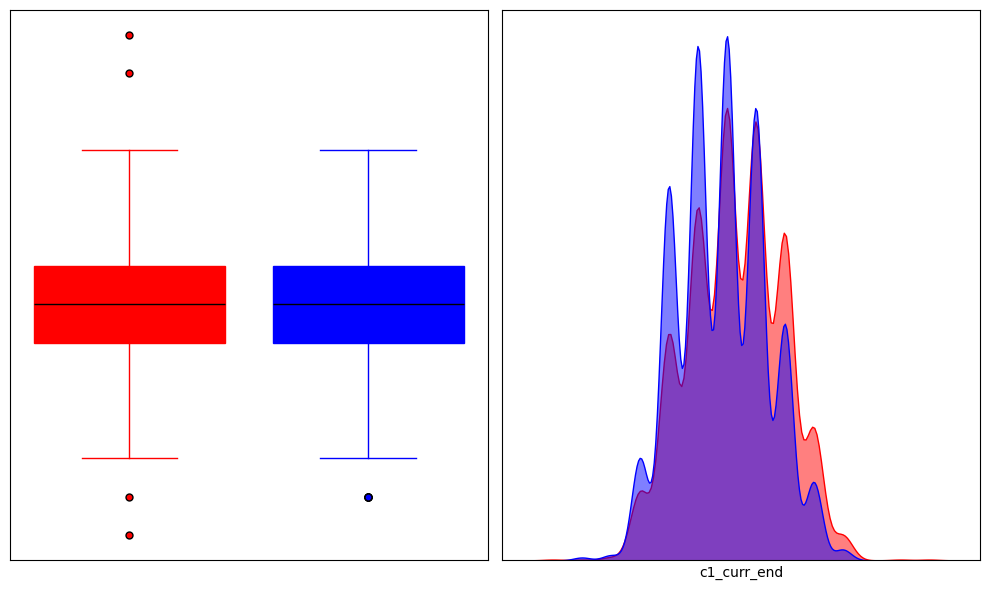

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


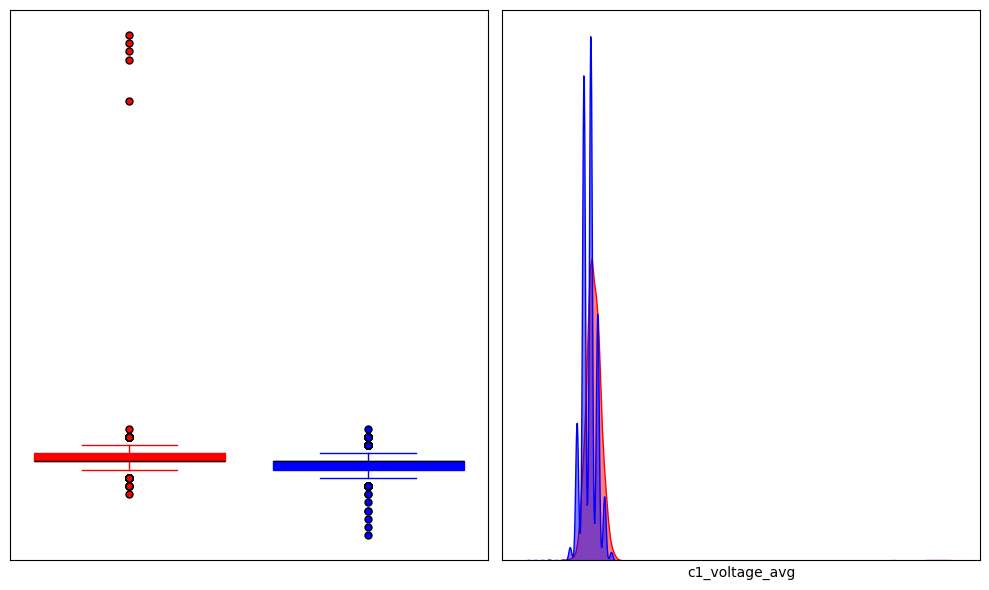

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


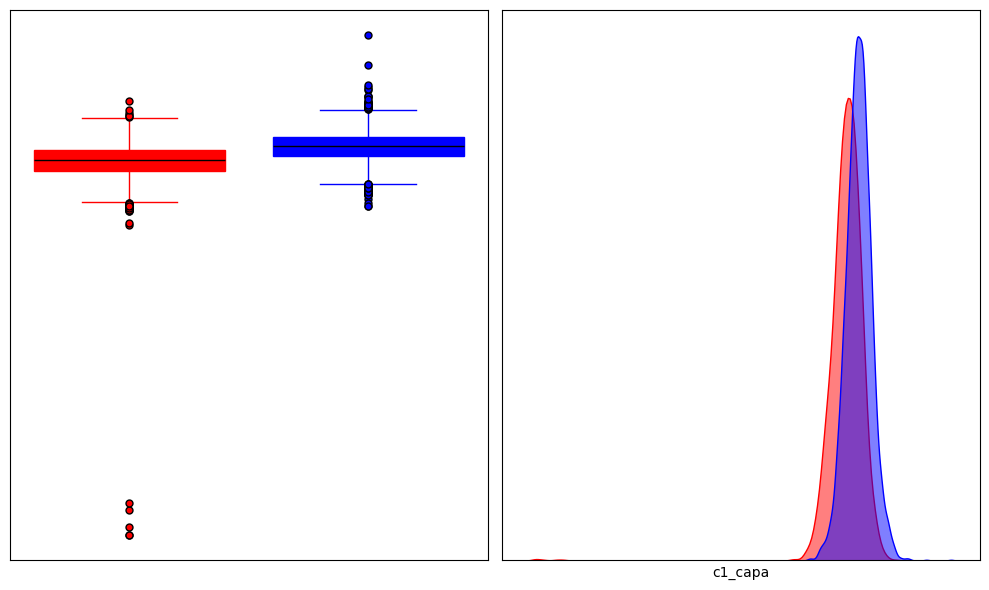

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


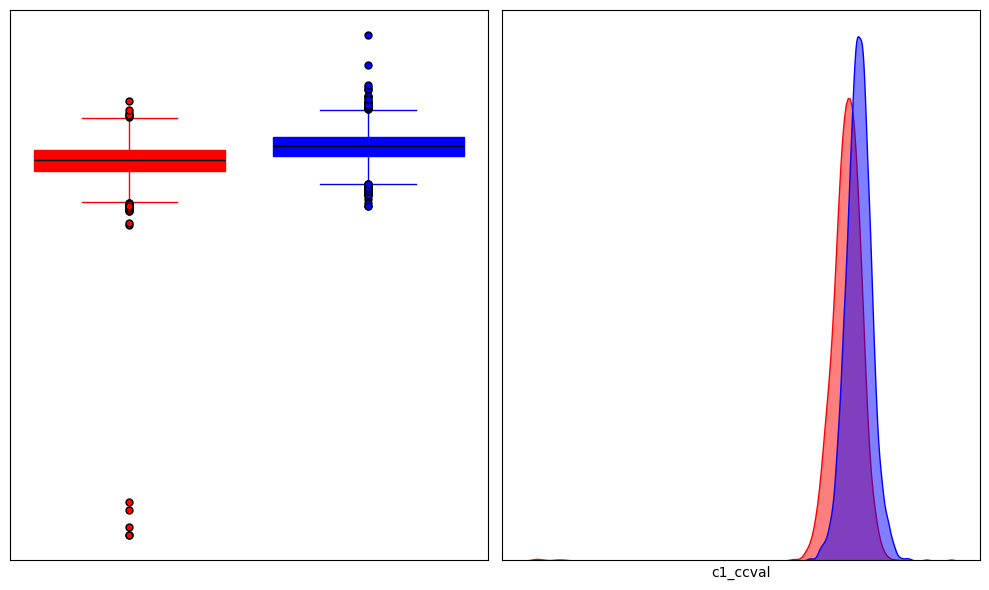

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


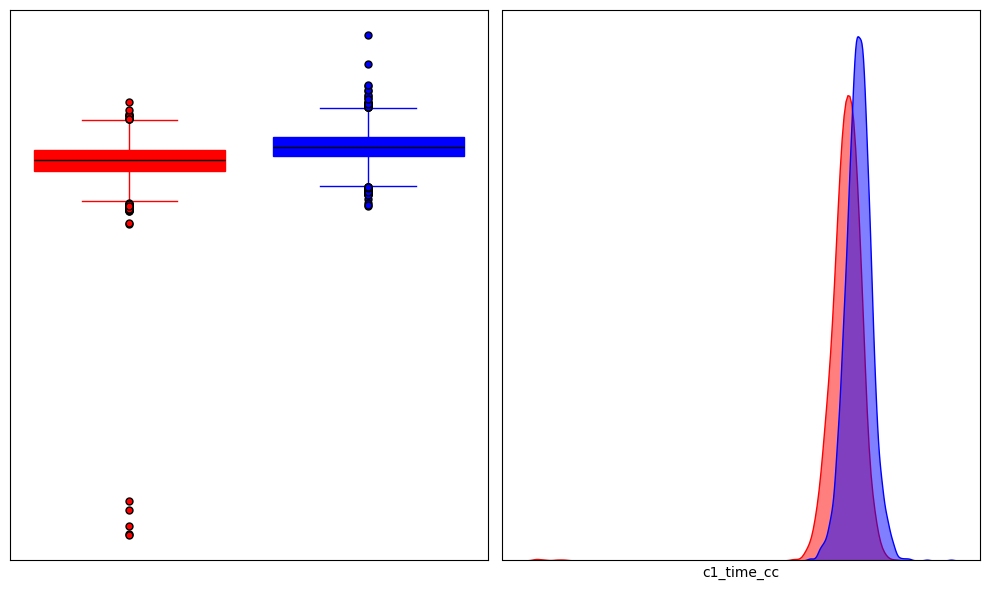

C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SU_HYUN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


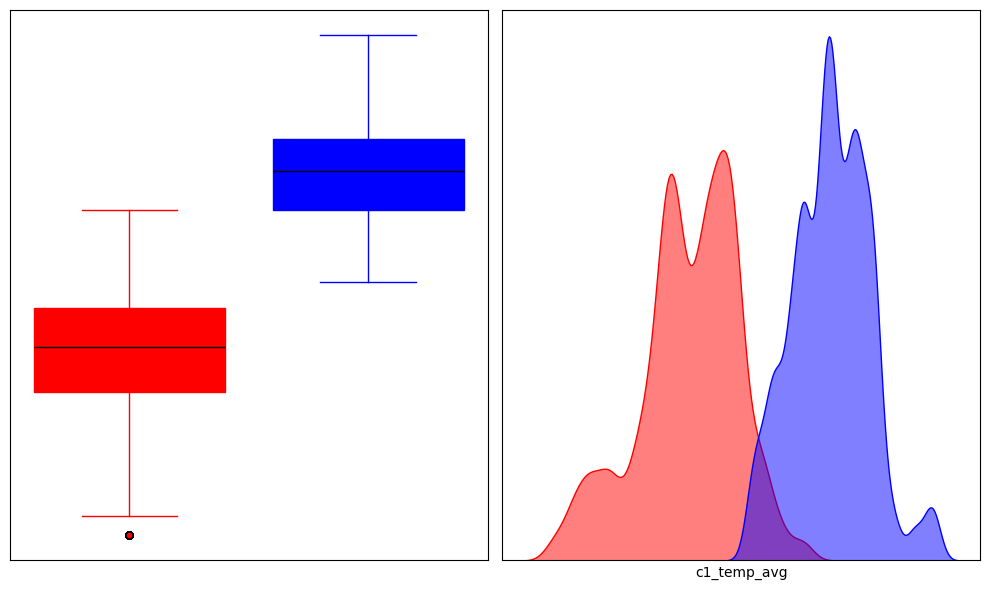

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_comparison_percentage(var_name, first_section, second_section, colors):
    first_section_var = first_section[var_name]
    second_section_var = second_section[var_name]
    
    plt.figure(figsize=(10, 6))
    
    # Boxplot for both sections
    ax1 = plt.subplot(1, 2, 1)
    boxprops1 = dict(facecolor=colors[0], color=colors[0])
    boxprops2 = dict(facecolor=colors[1], color=colors[1])
    medianprops = dict(color='black')
    whiskerprops1 = dict(color=colors[0])
    whiskerprops2 = dict(color=colors[1])
    capprops1 = dict(color=colors[0])
    capprops2 = dict(color=colors[1])
    flierprops1 = dict(markerfacecolor=colors[0], marker='o', markersize=5, linestyle='none')
    flierprops2 = dict(markerfacecolor=colors[1], marker='o', markersize=5, linestyle='none')
    
    # Create individual boxplots with increased width
    bplot1 = plt.boxplot([first_section_var], positions=[1], patch_artist=True, widths=0.8,
                         boxprops=boxprops1, medianprops=medianprops, whiskerprops=whiskerprops1,
                         capprops=capprops1, flierprops=flierprops1)
    bplot2 = plt.boxplot([second_section_var], positions=[2], patch_artist=True, widths=0.8,
                         boxprops=boxprops2, medianprops=medianprops, whiskerprops=whiskerprops2,
                         capprops=capprops2, flierprops=flierprops2)
    
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    # KDE plot for both sections
    ax2 = plt.subplot(1, 2, 2)
    sns.kdeplot(first_section_var, fill=True, alpha=0.5, color=colors[0], ax=ax2)
    sns.kdeplot(second_section_var, fill=True, alpha=0.5, color=colors[1], ax=ax2)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_ylabel('')
    
    plt.tight_layout()
    plt.show()

# 비교하고자 하는 각 변수에 대해 시각화 수행
colors = ['red', 'blue']  # 원하는 색상을 지정합니다.
for var in variables_to_compare:
    plot_comparison_percentage(var, first_section, second_section, colors)


### c1_curr_end

In [43]:
first_section[first_section['c1_curr_end'] > 6805]['judge']

4807     0
15550    0
Name: judge, dtype: int64

In [47]:
first_section[first_section['c1_curr_end'] < 6796]['judge']

6165     0
16636    0
Name: judge, dtype: int64

### c1_voltage_avg

In [44]:
first_section[first_section['c1_voltage_avg'] > 3820]['judge']

6827     0
10479    0
14775    0
23829    0
30912    0
Name: judge, dtype: int64

### c1_capa

In [45]:
first_section[first_section['c1_capa'] < 6000]['judge']

6827     0
10479    0
14775    0
23829    0
30912    0
Name: judge, dtype: int64

### c1_ccval

In [48]:
first_section[first_section['c1_ccval'] < 6000]['judge']

6827     0
10479    0
14775    0
23829    0
30912    0
Name: judge, dtype: int64

### c1_time_cc

In [50]:
first_section[first_section['c1_time_cc'] < 3200]['judge']

6827     0
10479    0
14775    0
23829    0
30912    0
Name: judge, dtype: int64

### c1_temp_avg

In [51]:
first_section[first_section['c1_temp_avg'] < 240]['judge']

19781    0
19782    0
19783    0
19784    0
19785    1
        ..
25324    1
25325    1
25326    0
25327    1
25328    0
Name: judge, Length: 171, dtype: int64

### 음

In [88]:
# Reimport necessary modules and redefine the tools if needed
import pandas as pd

# Filter columns that contain 'col' and 'dan'
filtered_columns = [col for col in data.columns if 'col' in col or 'dan' in col]
filtered_data = data[filtered_columns]



In [89]:
filtered_data

,rta1_box_col,rta1_box_dan,hta1_box_col,hta1_box_dan,rta2_box_col,rta2_box_dan,ocv1_box_col,ocv1_box_dan,c1_box_col,c1_box_dan,...,pc1_box_col,pc1_box_dan,sa1_box_col,sa1_box_dan,sa2_box_col,sa2_box_dan,sa3_box_col,sa3_box_dan,c1_box_col_numeric,c1_box_dan_numeric
0,04열,04단,03열,04단,07열,08단,06열,09단,06열,09단,...,01열,01단,16열,04단,11열,04단,16열,10단,6,9
1,04열,04단,03열,04단,07열,08단,06열,09단,06열,09단,...,01열,01단,16열,04단,11열,04단,16열,10단,6,9
2,04열,04단,03열,04단,07열,08단,06열,09단,06열,09단,...,01열,01단,16열,04단,11열,04단,16열,10단,6,9
3,04열,04단,03열,04단,07열,08단,06열,09단,06열,09단,...,01열,01단,16열,04단,11열,04단,16열,10단,6,9
4,04열,04단,03열,04단,07열,08단,06열,09단,06열,09단,...,01열,01단,16열,04단,11열,04단,16열,10단,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31025,08열,03단,02열,06단,03열,06단,02열,05단,02열,05단,...,08열,01단,11열,08단,14열,08단,11열,13단,2,5
31026,08열,03단,02열,06단,03열,06단,02열,05단,02열,05단,...,08열,01단,11열,08단,14열,08단,11열,13단,2,5
31027,08열,03단,02열,06단,03열,06단,02열,05단,02열,05단,...,08열,01단,11열,08단,14열,08단,11열,13단,2,5
31028,08열,03단,02열,06단,03열,06단,02열,05단,02열,05단,...,08열,01단,11열,08단,14열,08단,11열,13단,2,5


In [90]:
# Display the complete filtered data without truncation
pd.set_option('display.max_columns', None)
filtered_data.head(10)


,rta1_box_col,rta1_box_dan,hta1_box_col,hta1_box_dan,rta2_box_col,rta2_box_dan,ocv1_box_col,ocv1_box_dan,c1_box_col,c1_box_dan,dc1_box_col,dc1_box_dan,c2_box_col,c2_box_dan,dc2_box_col,dc2_box_dan,c3_box_col,c3_box_dan,dc3_box_col,dc3_box_dan,c4_box_col,c4_box_dan,ocv2_box_col,ocv2_box_dan,pg1_box_col,pg1_box_dan,pc1_box_col,pc1_box_dan,sa1_box_col,sa1_box_dan,sa2_box_col,sa2_box_dan,sa3_box_col,sa3_box_dan,c1_box_col_numeric,c1_box_dan_numeric
0,04열,04단,03열,04단,07열,08단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,01열,01단,01열,01단,16열,04단,11열,04단,16열,10단,6,9
1,04열,04단,03열,04단,07열,08단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,01열,01단,01열,01단,16열,04단,11열,04단,16열,10단,6,9
2,04열,04단,03열,04단,07열,08단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,01열,01단,01열,01단,16열,04단,11열,04단,16열,10단,6,9
3,04열,04단,03열,04단,07열,08단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,01열,01단,01열,01단,16열,04단,11열,04단,16열,10단,6,9
4,04열,04단,03열,04단,07열,08단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,01열,01단,01열,01단,16열,04단,11열,04단,16열,10단,6,9
5,04열,04단,03열,04단,07열,08단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,01열,01단,01열,01단,16열,04단,11열,04단,16열,10단,6,9
6,04열,04단,03열,04단,07열,08단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,01열,01단,01열,01단,16열,04단,11열,04단,16열,10단,6,9
7,04열,04단,03열,04단,07열,08단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,01열,01단,01열,01단,16열,04단,11열,04단,16열,10단,6,9
8,04열,04단,03열,04단,07열,08단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,01열,01단,01열,01단,16열,04단,11열,04단,16열,10단,6,9
9,04열,04단,03열,04단,07열,08단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,06열,09단,01열,01단,01열,01단,16열,04단,11열,04단,16열,10단,6,9


c1부터 ocv2까지는 열 단 동일?

# 첫번째 구역과 두번째 구역의 불량값으로 변수 비교

In [28]:
# 첫번째 구역에서 불량인 값을 필터링
first_section_failures = first_section[first_section['judge'] == 1]

# 불량 데이터 확인
first_section_failures.head()


,lot_id,tray_id,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,c2_tat,dc2_tat,...,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an,c1_box_col_numeric,c1_box_dan_numeric
1598,LOT-102,TRAY-1097,217541,87746,44156,119,3565,404,460,405,...,3759.9,5.1,6.8,4728.000000,37588.00,95.000000,584.000,-23.000000,19,2
1604,LOT-102,TRAY-1097,217541,87746,44156,119,3565,404,460,405,...,3759.7,5.0,6.7,4726.000000,37588.00,91.000000,542.000,-86.000000,19,2
1613,LOT-102,TRAY-1097,217541,87746,44156,119,3565,404,460,405,...,3759.8,4.9,6.6,4727.000000,37589.00,91.000000,542.000,-31.000000,19,2
1622,LOT-102,TRAY-1098,217540,87746,44156,118,3568,405,464,405,...,3756.0,7.5,9.9,4713.208333,37584.75,92.833333,567.375,32.041667,20,2
1919,LOT-102,TRAY-1129,216888,86468,46856,118,3571,406,453,405,...,3760.3,5.2,6.9,4687.000000,37593.00,93.000000,564.000,106.000000,19,3


In [29]:
# 두번째 구역에서 불량인 값을 필터링
second_section_failures = second_section[second_section['judge'] == 1]

# 불량 데이터 확인
second_section_failures.head()


,lot_id,tray_id,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,c2_tat,dc2_tat,...,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an,c1_box_col_numeric,c1_box_dan_numeric
127,LOT-100,TRAY-1009,217980,86526,4486,119,3558,405,458,405,...,3760.4,4.9,6.6,4747.0,37594.0,92.0,545.0,182.0,10,10
1691,LOT-102,TRAY-1103,217272,86461,44981,118,3592,404,446,405,...,3759.7,5.3,7.1,4688.0,37585.0,92.0,630.0,-73.0,12,10
1699,LOT-102,TRAY-1103,217272,86461,44981,118,3592,404,446,405,...,3760.2,5.2,6.9,4712.0,37592.0,93.0,567.0,132.0,12,10
1703,LOT-102,TRAY-1103,217272,86461,44981,118,3592,404,446,405,...,3760.4,5.2,6.9,4738.0,37594.0,93.0,567.0,123.0,12,10
1704,LOT-102,TRAY-1103,217272,86461,44981,118,3592,404,446,405,...,3760.5,5.2,7.0,4719.0,37595.0,94.0,588.0,181.0,12,10


In [30]:
# 비교하고자 하는 변수 목록
variables_to_compare = [
    'c1_curr_end', 'c1_voltage_avg', 'c1_capa', 'c1_ccval',
    'c1_time_cc', 'c1_temp_avg'
]

# 각 변수에 대한 비교 결과를 저장할 데이터프레임 생성
comparison_results_failures = pd.DataFrame()

# 각 변수를 순회하면서 통계 비교 수행
for var in variables_to_compare:
    first_section_failures_var = first_section_failures[var]
    second_section_failures_var = second_section_failures[var]
    
    comparison = pd.DataFrame({
        'First Section Failures': first_section_failures_var.describe(),
        'Second Section Failures': second_section_failures_var.describe()
    })
    
    # 비교 결과를 통합
    comparison_results_failures = pd.concat([comparison_results_failures, comparison], axis=1)

comparison_results_failures


,First Section Failures,Second Section Failures,First Section Failures,Second Section Failures,First Section Failures,Second Section Failures,First Section Failures,Second Section Failures,First Section Failures,Second Section Failures,First Section Failures,Second Section Failures
count,323.000000,58.000000,323.000000,58.000000,323.000000,58.000000,323.000000,58.000000,323.000000,58.000000,323.000000,58.000000
mean,6800.222910,6799.396552,3780.520124,3780.189655,6443.529412,6463.637931,6443.529412,6463.637931,3413.157895,3424.189655,252.650155,295.913793
std,1.723018,1.425823,0.979002,0.736442,24.049152,21.817182,24.049152,21.817182,12.677920,11.662591,9.727573,9.758999
min,6796.000000,6797.000000,3778.000000,3779.000000,6353.000000,6427.000000,6353.000000,6427.000000,3366.000000,3404.000000,232.000000,272.000000
25%,6799.000000,6798.000000,3780.000000,3780.000000,6427.500000,6449.250000,6427.500000,6449.250000,3404.000000,3416.250000,248.000000,289.000000
50%,6800.000000,6799.000000,3780.000000,3780.000000,6444.000000,6465.000000,6444.000000,6465.000000,3413.000000,3425.000000,254.000000,296.000000
75%,6801.000000,6801.000000,3781.000000,3781.000000,6458.000000,6473.750000,6458.000000,6473.750000,3421.000000,3429.000000,258.000000,305.000000
max,6804.000000,6802.000000,3784.000000,3783.000000,6519.000000,6532.000000,6519.000000,6532.000000,3453.000000,3461.000000,278.000000,309.000000


In [99]:
# 각 변수를 별도로 비교할 수 있도록 함수 작성
def compare_failure_variable(var_name):
    first_section_failures_var = first_section_failures[var_name]
    second_section_failures_var = second_section_failures[var_name]
    
    comparison = pd.DataFrame({
        'First Section Failures': first_section_failures_var.describe(),
        'Second Section Failures': second_section_failures_var.describe()
    })
    
    return comparison

# 각 변수를 비교한 결과를 저장
comparison_results_failures = {var: compare_failure_variable(var) for var in variables_to_compare}

comparison_results_failures


{'c1_curr_end':        First Section Failures  Second Section Failures
 count              323.000000                 3.000000
 mean              6800.222910              6801.333333
 std                  1.723018                 0.577350
 min               6796.000000              6801.000000
 25%               6799.000000              6801.000000
 50%               6800.000000              6801.000000
 75%               6801.000000              6801.500000
 max               6804.000000              6802.000000,
 'c1_voltage_avg':        First Section Failures  Second Section Failures
 count              323.000000                 3.000000
 mean              3780.520124              3779.666667
 std                  0.979002                 0.577350
 min               3778.000000              3779.000000
 25%               3780.000000              3779.500000
 50%               3780.000000              3780.000000
 75%               3781.000000              3780.000000
 max          

# 구역별 변수 비교 시각화 (불량만 존재)
## (첫번째 구역 : 불량개수 많음 / 두번째 구역 : 중앙값)

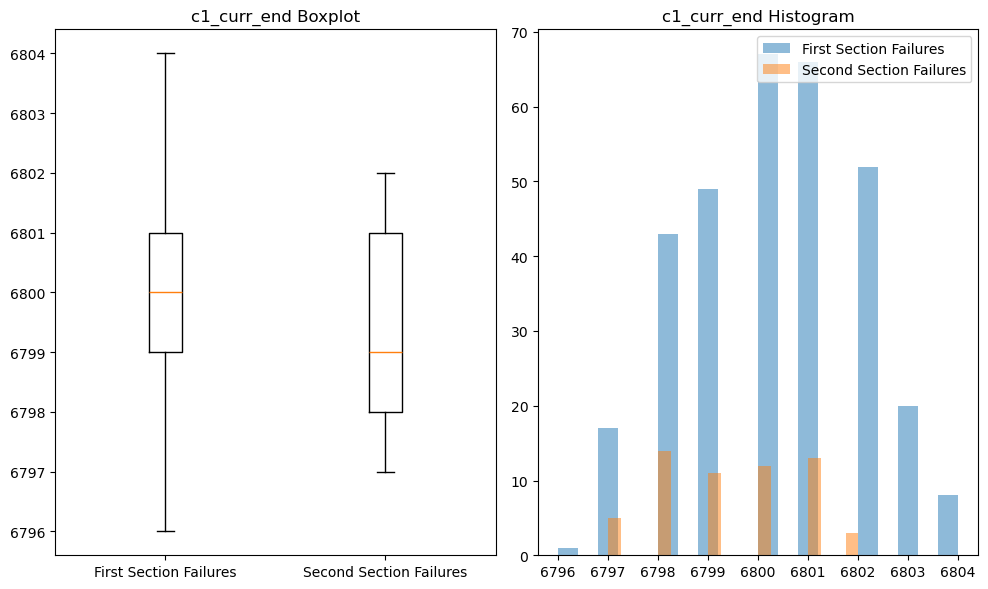

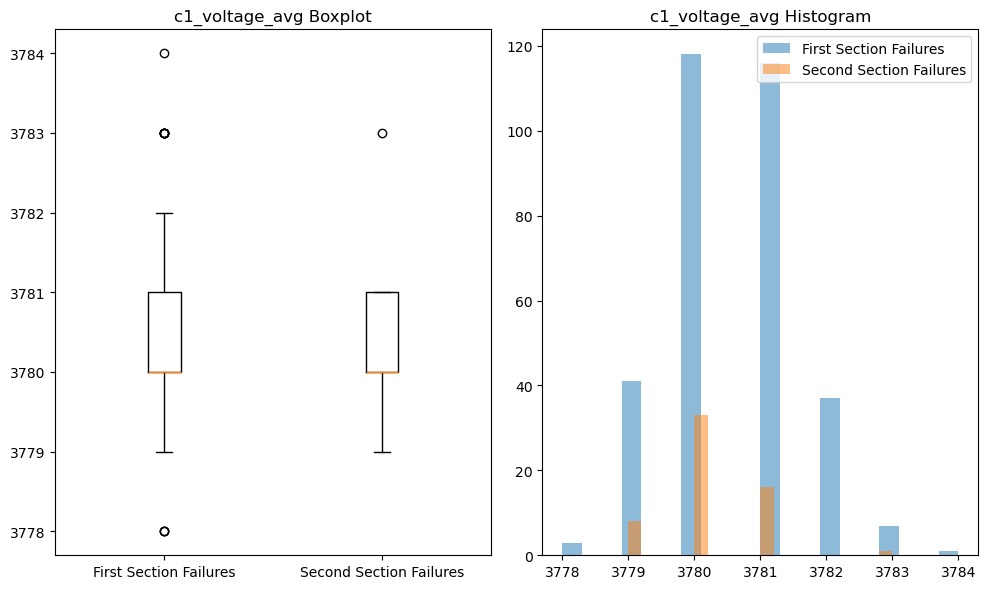

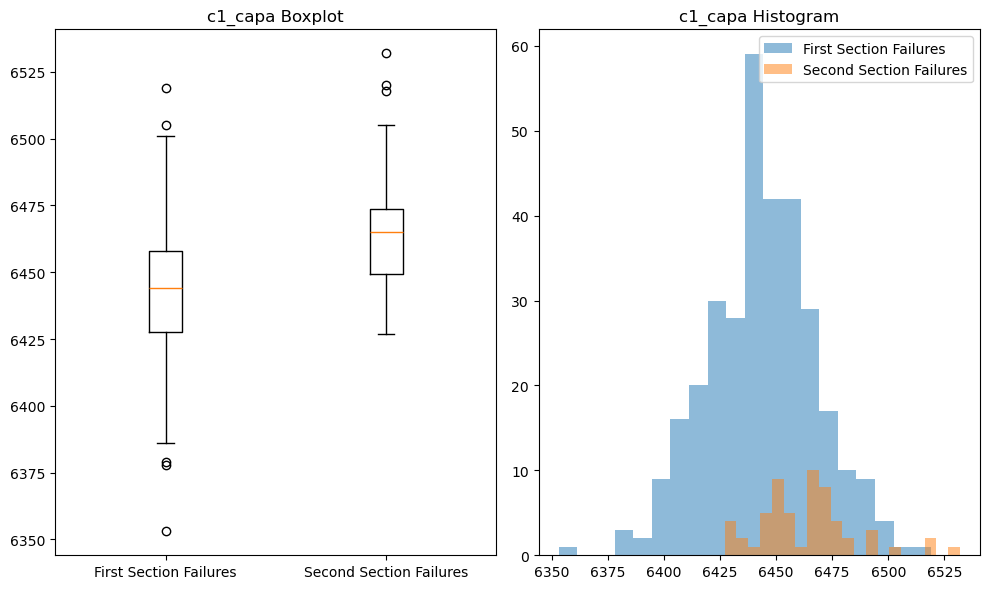

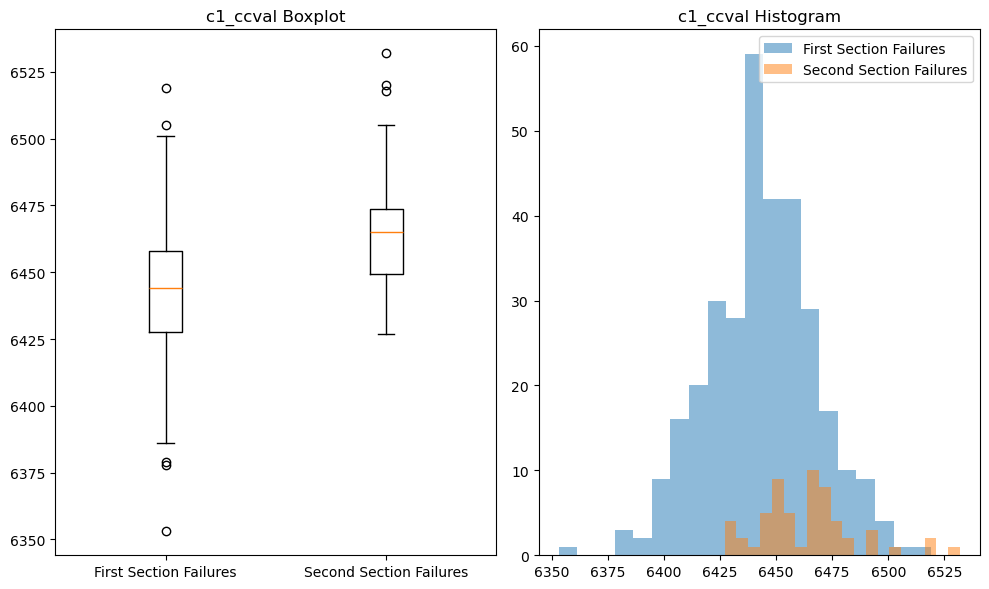

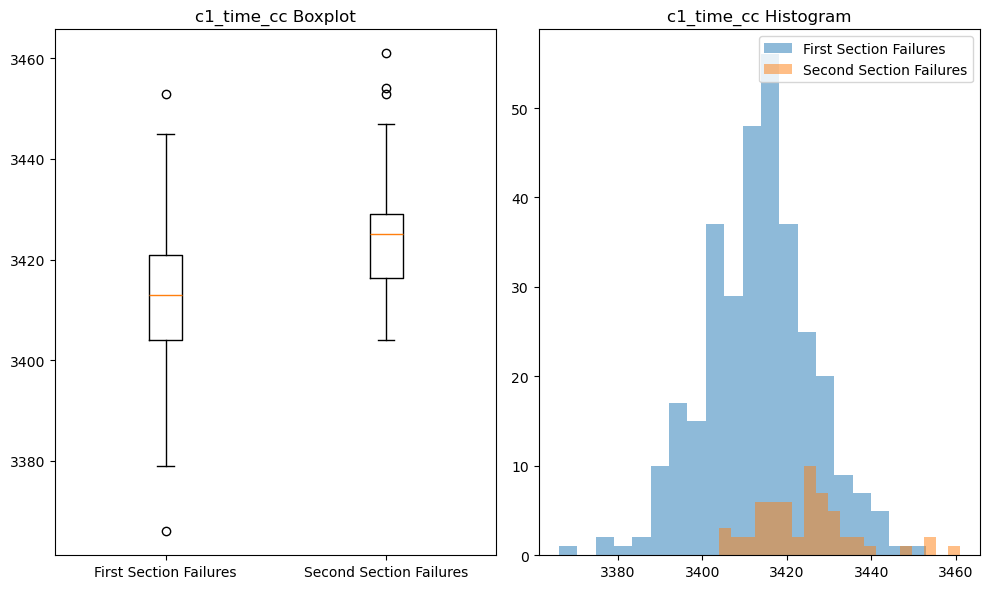

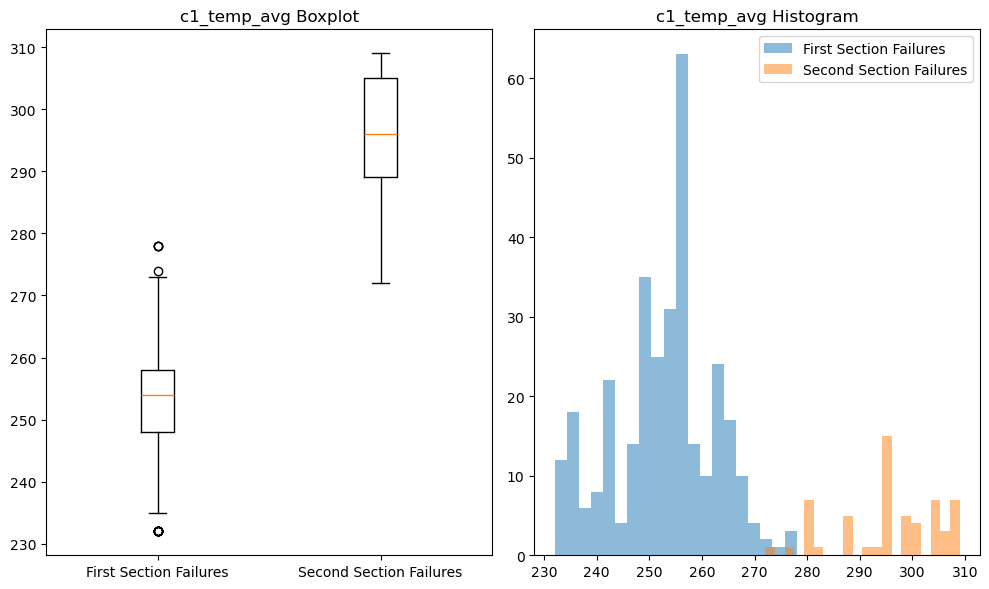

In [31]:
import matplotlib.pyplot as plt

# 시각화를 위한 함수 정의
def plot_failure_comparison(var_name, first_failures, second_failures):
    first_failures_var = first_failures[var_name]
    second_failures_var = second_failures[var_name]
    
    plt.figure(figsize=(10, 6))
    
    # Boxplot for both sections
    plt.subplot(1, 2, 1)
    plt.boxplot([first_failures_var, second_failures_var], labels=['First Section Failures', 'Second Section Failures'])
    plt.title(f'{var_name} Boxplot')
    
    # Histogram for both sections
    plt.subplot(1, 2, 2)
    plt.hist(first_failures_var, alpha=0.5, label='First Section Failures', bins=20)
    plt.hist(second_failures_var, alpha=0.5, label='Second Section Failures', bins=20)
    plt.legend(loc='upper right')
    plt.title(f'{var_name} Histogram')
    
    plt.tight_layout()
    plt.show()

# 비교하고자 하는 각 변수에 대해 시각화 수행
for var in variables_to_compare:
    plot_failure_comparison(var, first_section_failures, second_section_failures)


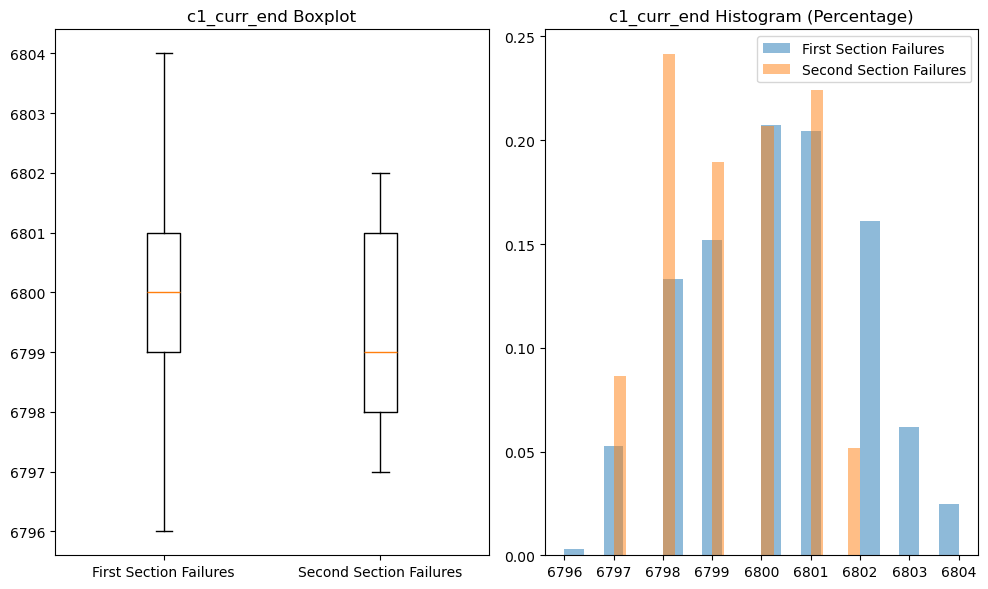

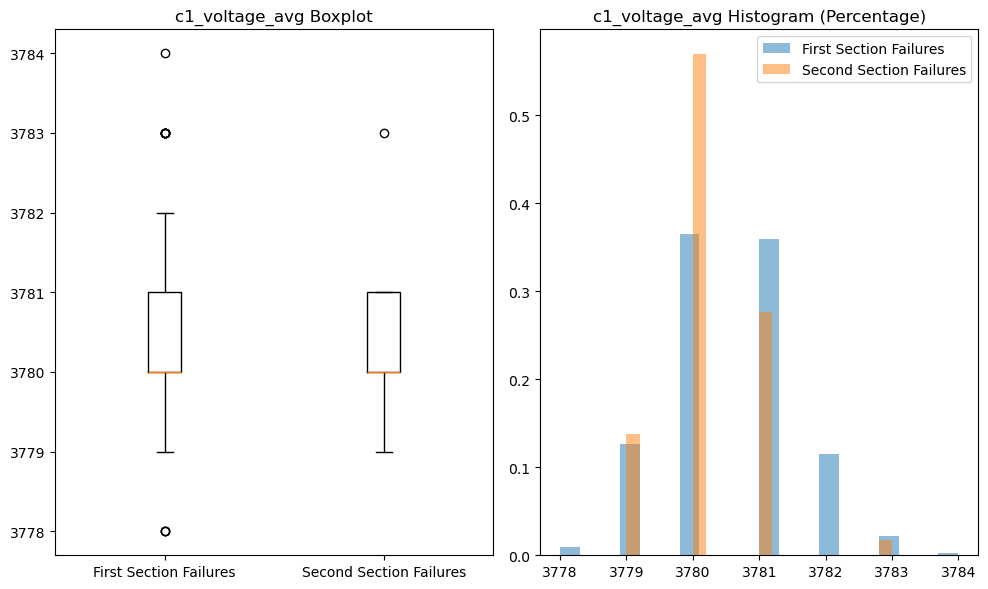

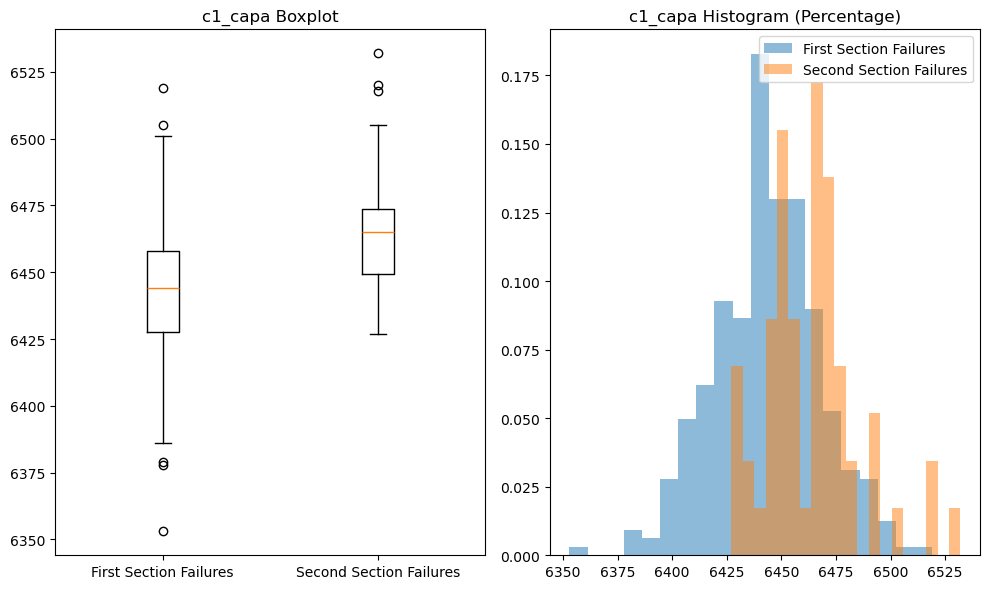

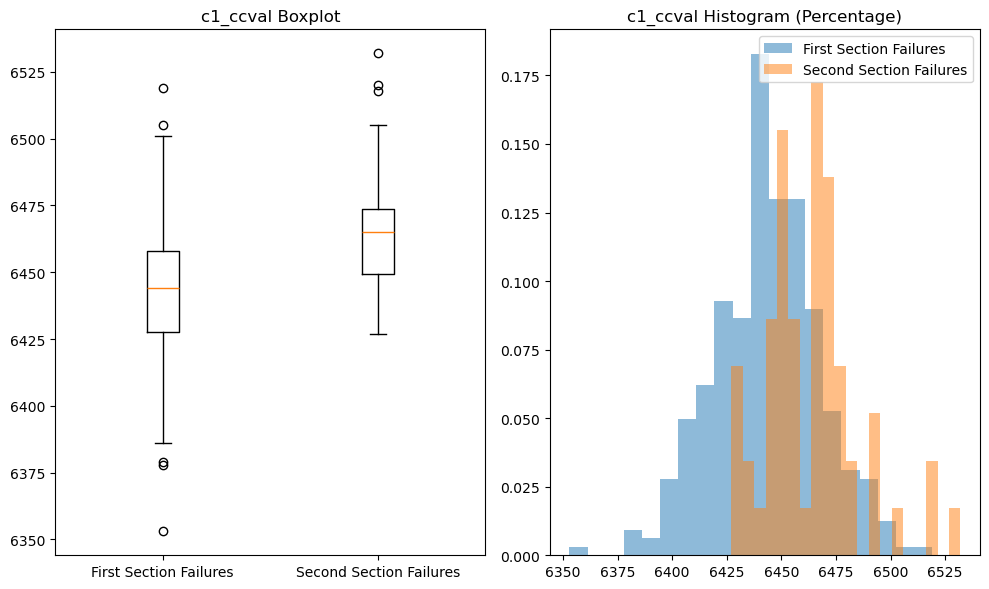

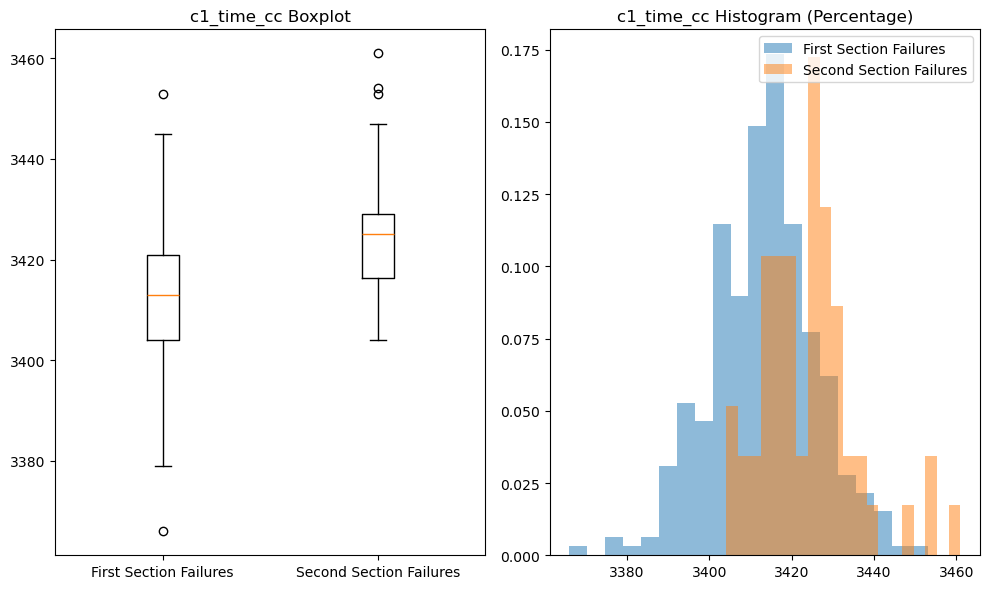

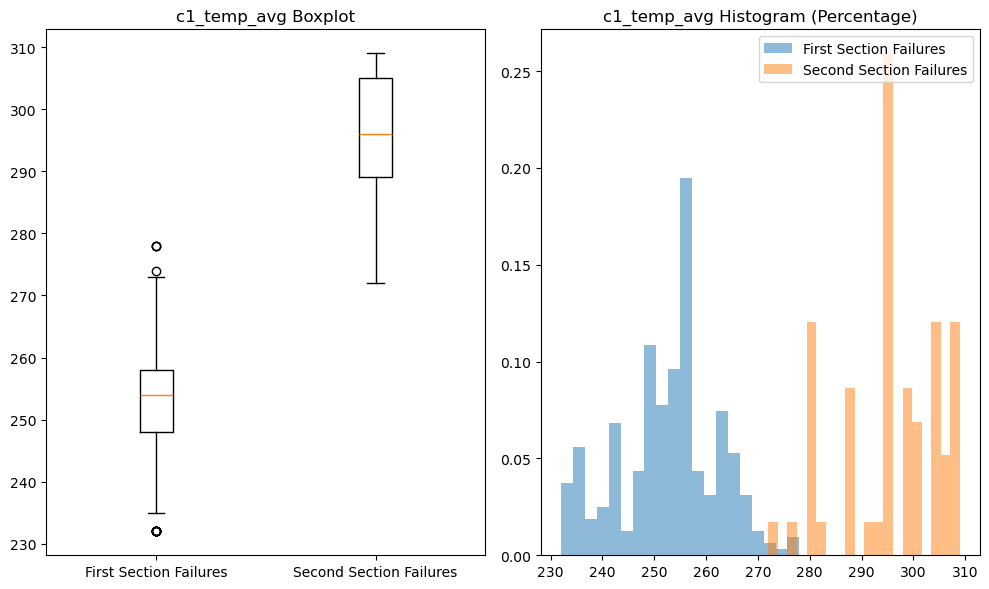

In [32]:
# 시각화를 위한 함수 정의
def plot_failure_comparison_percentage(var_name, first_failures, second_failures):
    first_failures_var = first_failures[var_name]
    second_failures_var = second_failures[var_name]
    
    plt.figure(figsize=(10, 6))
    
    # Boxplot for both sections
    plt.subplot(1, 2, 1)
    plt.boxplot([first_failures_var, second_failures_var], labels=['First Section Failures', 'Second Section Failures'])
    plt.title(f'{var_name} Boxplot')
    
    # Histogram for both sections with percentage
    plt.subplot(1, 2, 2)
    first_counts, first_bins = np.histogram(first_failures_var, bins=20)
    second_counts, second_bins = np.histogram(second_failures_var, bins=20)
    
    first_percentage = first_counts / first_counts.sum()
    second_percentage = second_counts / second_counts.sum()
    
    plt.bar(first_bins[:-1], first_percentage, width=np.diff(first_bins), alpha=0.5, label='First Section Failures', align='edge')
    plt.bar(second_bins[:-1], second_percentage, width=np.diff(second_bins), alpha=0.5, label='Second Section Failures', align='edge')
    
    plt.legend(loc='upper right')
    plt.title(f'{var_name} Histogram (Percentage)')
    
    plt.tight_layout()
    plt.show()

# 비교하고자 하는 각 변수에 대해 시각화 수행
for var in variables_to_compare:
    plot_failure_comparison_percentage(var, first_section_failures, second_section_failures)


In [41]:
first_section[first_section['c1_curr_end'] > 6805]['judge']

4807     0
15550    0
Name: judge, dtype: int64

In [39]:
first_section_failures

,lot_id,tray_id,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,c2_tat,dc2_tat,...,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an,c1_box_col_numeric,c1_box_dan_numeric
1598,LOT-102,TRAY-1097,217541,87746,44156,119,3565,404,460,405,...,3759.9,5.1,6.8,4728.000000,37588.00,95.000000,584.000,-23.000000,19,2
1604,LOT-102,TRAY-1097,217541,87746,44156,119,3565,404,460,405,...,3759.7,5.0,6.7,4726.000000,37588.00,91.000000,542.000,-86.000000,19,2
1613,LOT-102,TRAY-1097,217541,87746,44156,119,3565,404,460,405,...,3759.8,4.9,6.6,4727.000000,37589.00,91.000000,542.000,-31.000000,19,2
1622,LOT-102,TRAY-1098,217540,87746,44156,118,3568,405,464,405,...,3756.0,7.5,9.9,4713.208333,37584.75,92.833333,567.375,32.041667,20,2
1919,LOT-102,TRAY-1129,216888,86468,46856,118,3571,406,453,405,...,3760.3,5.2,6.9,4687.000000,37593.00,93.000000,564.000,106.000000,19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29223,LOT-142,TRAY-2787,152949,87347,156328,119,3548,405,445,405,...,3759.9,5.0,6.7,4760.000000,37592.00,93.000000,550.000,114.000000,22,2
29226,LOT-142,TRAY-2787,152949,87347,156328,119,3548,405,445,405,...,3760.4,5.0,6.7,4731.000000,37595.00,93.000000,596.000,-23.000000,22,2
29228,LOT-142,TRAY-2787,152949,87347,156328,119,3548,405,445,405,...,3760.1,5.0,6.7,4743.000000,37593.00,93.000000,573.000,71.000000,22,2
29853,LOT-143,TRAY-2735,157332,86491,148862,119,3555,405,439,405,...,3759.0,4.9,6.6,4752.000000,37583.00,93.000000,542.000,16.000000,22,1


SyntaxError: invalid syntax (2497746786.py, line 1)

In [78]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [91]:

data = pd.read_csv('data_fin.csv')


In [92]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from collections import Counter

In [95]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# 데이터 불러오기
data = pd.read_csv('data_fin.csv')

# 문자열 피처 제거 또는 변환
# 비숫자형 컬럼 확인
non_numeric_columns = data.select_dtypes(include=['object']).columns

# 비숫자형 컬럼을 제거
X = data.drop(columns=non_numeric_columns)
y = data['judge']

# 'judge' 컬럼이 X에 존재하지 않는지 확인
if 'judge' in X.columns:
    X = X.drop(columns=['judge'])

# 필요한 경우 NaN 값을 0으로 대체 (또는 다른 방법으로 처리)
X = X.fillna(0)

# SMOTE 적용
smote = SMOTE(random_state=1234)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 오버샘플링된 데이터 결합
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['judge'])], axis=1)

# 오버샘플링된 데이터 저장 또는 출력
resampled_data.to_csv('resampled_data_fin.csv', index=False)

# 결과 데이터셋의 크기 확인
resampled_data.shape

# 오버샘플링된 데이터의 일부를 출력
resampled_data.head()


,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,c2_tat,dc2_tat,c3_tat,dc3_tat,...,socv2_ocv,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an,judge
0,217709,86476,4524,118,3580,405,453,405,1808,3903,...,3761.4,3759.6,5.0,6.8,4709.0,37583.0,92.0,626.0,109.0,양품
1,217709,86476,4524,118,3580,405,453,405,1808,3903,...,3762.1,3760.4,5.1,6.8,4712.0,37591.0,92.0,606.0,5.0,양품
2,217709,86476,4524,118,3580,405,453,405,1808,3903,...,3762.2,3760.4,4.9,6.7,4737.0,37594.0,92.0,566.0,-10.0,양품
3,217709,86476,4524,118,3580,405,453,405,1808,3903,...,3760.8,3759.0,5.1,6.9,4709.0,37578.0,92.0,606.0,111.0,양품
4,217709,86476,4524,118,3580,405,453,405,1808,3903,...,3760.7,3759.0,5.0,6.7,4706.0,37577.0,93.0,606.0,-38.0,양품


In [104]:

# 데이터 불러오기
data = pd.read_csv('data_fin.csv')
data["judge"] = data["judge"].map(lambda x : 0 if x == "양품" else 1)

In [105]:
from imblearn.over_sampling import SMOTE
print(data.value_counts(['judge']), "\n")

judge
0        29995
1         1024
Name: count, dtype: int64 



In [106]:
print("judge=1 비율", data.value_counts(data['judge']==1), len(data))

judge=1 비율 judge
False    29995
True      1024
Name: count, dtype: int64 31019
